<h1 align="center">FEATURE SELECTION</h1>
<h2 align="left"><ins>Lesson Guide</ins></h2>


- [**WHAT IS FEATURE SELECTION?**](#what)
- [**TYPES OF FEATURE SELECTION METHODS**](#types)
    - [**Wrapper**](#wrapper)
    - [**Filter**](#filter)
    - [**Intrinsic (Embedded)**](#embed)
- [**STATISTICS FOR (FILTER-BASED) FEATURE SELECTION**](#statistics)
    - [**Numerical Input, Numerical Output**](#ni_no)
        - [**Pearson’s correlation coefficient**](#ni_no)
        - [**Spearman’s rank coefficient**](#ni_no)
        - [**Mutual Information**](#ni_no)
    - [**Numerical Input, Categorical Output**](#ni_co)
        - [**ANOVA (F-statistic) correlation coefficient**](#ni_co)
        - [**Kendall’s rank coefficient**](#ni_co)
        - [**Mutual Information**](#ni_co)
    - [**Categorical Input, Numerical Output**](#ci_no)
    - [**Categorical Input, Categorical Output**](#ci_co)
        - [**Chi-Squared test (contingency tables)**](#ci_co)
        - [**Mutual Information**](#ci_co)
    - [**Example 1: Categorical Input, Categorical Output**](#eg1)
        - [**Tune the Number of Selected Features**](#eg1)
    - [**Example 2: Numerical Input, Categorical Output**](#eg2)    
        - [**Tune the Number of Selected Features**](#tune)
    - [**Example 3: Numerical Output**](#eg3)
        - [**Tune the Number of Selected Features**](#tuning)   
    - [**Univariate Feature Selection With GenericUnivariateSelect**](#univariate)
- [**FEATURE SELECTION WITH ANY DATA TYPE (WRAPPER METHODS)**](#any)
    - [**Forward Selection**](#forward)
    - [**Backward Selection**](#backward)
    - [**Stepwise Selection**](#stepwise)
    - [**Sequential Selection using `Sklearn`**](#sklearn)
    - [**Sequential Selection using `mlxtend`**](#mlxtend)
    - [**Variance Thresholding**](#threshold)
- [**RECURSIVE FEATURE ELIMINATION (RFE)**](#rfe)
    - [**Basic Outline for RFE & RFECV**](#basic)
        - [**Choosing Number of Features Automatically**](#auto)
    - [**RFE for Classification: Numerical Input, Categorical Output**](#rfe_cla)
    - [**RFE for Regression: Numerical Input, Numerical Output**](#rfe_reg)
    - [**RFE Hyperparameters**](#hyper)
        - [**Explore Number of Features**](#explore)
        - [**Which Features Were Selected With RFE**](#which)
        - [**Automatically Select the Number of Features With RFECV**](#explore)
        - [**Which Features Were Selected with RFECV**](#which2)
        - [**Explore Base Algorithm**](#base)
    -[**RFECV with `Yellowbrick`**](#yellow)
- [**HOW TO USE FEATURE IMPORTANCE**](#importance)
    - [**What is Feature Importance?**](#fi)
    - [**Coefficients as Feature Importance**](#coeff)
        - [**A Note on Ridge, Lasso & Decision Trees**](#note)
        - [**Linear Regression Feature Importance**](#lr)
        - [**Logistic Regression Feature Importance**](#log)  
    - [**Decision Tree Feature Importance**](#which)
        - [**CART Regression Feature Importance**](#cart_reg)
        - [**CART Classification Feature Importance**](#cart_cla)
    - [**Random Forest Feature Importance**](#forest)
        - [**Random Forest Regression Feature Importance**](#forest_reg)
        - [**Random Forest Classification Feature Importance**](#forest_cla)
    - [**Permutation Feature Importance**](#perm)
        - [**Permutation Feature Importance for Regression**](#perm_reg)
        - [**Permutation Feature Importance for Classification**](#perm_cla)
    - [**Feature Selection with Importance**](#fsi)
    -[**Feature Importance with `Yellowbrick`**](#brick)
- [**REFERENCES**](#references)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# from sklearn.linear_model import LogisticRegression, LinearRegression
# from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.feature_selection import *
# from sklearn.metrics import *

<a id="what"></a>
<h1 align="center">WHAT IS FEATURE SELECTION?</h1>

In real world analytics, we often come across a large volume of candidate regressors, but most end up not being useful in regression modeling. Finding the most appropriate set of regressors is a variable selection issue. Unfortunately, variable selection has two conflicting goals:<br>
$\;\;\;\;\;$**a)** on the one hand, we try to include as many regressors as possible so that we can maximize the explanatory power of our model,<br>
$\;\;\;\;\;$**b)** on the other hand, we want as few predictors as possible because more regressors could lead to an increased variance in the prediction.

Feature selection is the process of reducing the number of input variables when developing a predictive model without sacrificing the predictive power. It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in many cases, to improve the performance of the model. Fewer features can allow machine learning algorithms to run more efficiently (less space or time complexity) and be more effective. Features that are redundant or irrelevant can actually mislead or negatively impact the model's performance (especially linear algorithms like linear and logistic regression), so it is necessary (and helpful) to remove them. 

Benefits of performing feature selection before modeling data:
- **Reduces overfitting**. By removing extraneous data, it allows the model to focus only on the important features of the data, and not get hung up on features that don’t matter.
- **Improves the accuracy** of the model’s predictions. Less misleading data means modeling accuracy improves. 
- **Reduces computation time** involved to get the model. Fewer data points reduce algorithm complexity.
- Finally, having a smaller number of features makes your model **more interpretable** and easy to understand.

**Overall, feature selection is key to being able to predict values with any amount of accuracy. The data features used to train a machine learning model have a huge influence on the performance. Irrelevant or partially relevant features can negatively impact model performance. The hope is that feature selection techniques can identify some or all of those features that are relevant to the target, or, at the very least, identify and remove some of the irrelevant input features.**

>***Feature Selection*** selects features to keep or remove from the dataset, whereas ***Dimensionality Reduction*** creates a projection of the data resulting in entirely new input features. As such, dimensionality reduction is an alternate to feature selection rather than a type of feature selection.

<a id="types"></a>
<h1 align="center">TYPES OF FEATURE SELECTION METHODS</h1>

One way to think about feature selection methods are in terms of **supervised** and **unsupervised methods**. The difference has to do with whether features are selected based on the target variable or not.
- **Unsupervised Selection**: Unsupervised feature selection techniques ignore the target variable, such as methods that remove redundant variables using correlation or features that have few values or low variance (i.e. data cleaning).
- **Supervised Selection**: Supervised feature selection techniques use the target variable, such as methods that remove irrelevant variables.

Supervised feature selection methods may further be classified into three groups:, including **intrinsic**, **wrapper** and **filter** methods.
<a id="wrapper"></a>
1. **Wrapper** methods are those which marry the feature selection process to the type of model being built, evaluating feature subsets in order to detect the model performance between features, and subsequently select the best performing subset. In other words, instead of existing as an independent process taking place prior to model building, wrapper methods attempt to optimize feature selection process for a given machine learning algorithm in tandem with the algorithm. ***The most notable wrapper methods are: forwards, backwards & stepwise selection as well as RFE. RFE is computationally less complex using the feature weight coefficients (e.g., linear models) or feature importance (tree-based algorithms) to eliminate features recursively, whereas forwards or backwards eliminate (or add) features based on a user-defined classifier/regression performance metric.***<br><br>Some of the **benefits** of wrapper methods:  
<ul>
<li>A good starting point if you have no intuition about the data and what features may be important.</li>
<li>It effectively selects a model with significant features from a large amount of data and is unconcerned with the variable types.</li>
<li>Wrapper methods evaluate subsets of variables which allows, unlike filter approaches, to detect the possible interactions amongst variables.</li>
</ul><br>Some of the <b>drawbacks</b> of wrapper methods:
<ul>
<li>The methods do not run through every single combination of features (i.e no interaction terms), so they may not end up with the absolute best model.</li>
<li>It can result in a model with high multicollinearity (inflated beta coefficients due to relationships among features), which is not great for predicting accurately.</li>
<li>The large computation time for data with many features.</li>
<li>It tends to overfit the model when there is not a large amount of data points.</li>
</ul>

<a id="filter"></a>

2. **Filter (statistical-based)** methods use statistical techniques to evaluate the relationship between each input variable and the target variable, and these scores are used as the basis to rank and choose those input variables that will be used in the model (i.e. have the strongest relationship with the target variable). Rather than tuning a model (as in wrapper methods), a subset of the features is selected through ranking them by a useful descriptive measure, other than error rate, to determine whether that feature is useful (a measure that is inherent to the feature and not dependent on a model). These methods can be fast & effective and will not overfit the data. However, one drawback is that they are blind to any interactions or correlations between features. This will need to be taken into account separately.<br><br>The choice of statistical measures depends on the data type of both the input and output variables. As such, it can be challenging for a machine learning practitioner to select an appropriate statistical measure for a dataset when performing filter-based feature selection. Statistical measures for feature selection must be carefully chosen based on the data type of the input variable and the output or response variable.<br><br>The statistical measures used in filter-based feature selection are generally calculated one input variable at a time with the target variable. As such, they are referred to as **univariate statistical measures**. This may mean that any interaction between input variables is not considered in the filtering process. In this case, the existence of correlated predictors makes it possible to select important, but redundant, predictors. The obvious consequences of this issue are that too many predictors are chosen and, as a result,  collinearity problems arise.


<a id="embed"></a>

3. Finally, there are some machine learning algorithms that perform feature  selection (and tuning) automatically as part of the machine learning process, meaning that the model will only include predictors that help maximize accuracy. In these cases, the model can pick and choose which representation of the data is best and are designed to remove features without predictive value. This generally leads to a happy medium between the two methods of feature selection previously explained, as the selection is done in conjunction with the model tuning process. We might refer to these techniques as **intrinsic** (or **embedded**) methods. This includes algorithms such as penalized regression models like Lasso, Ridge, Elastic Net and decision trees, including ensembles of decision trees like random forest.

>**An important note** for Ridge and Lasso regression is that all of the features must be standardized, because the lambda must be applied equally to each feature. Having one feature with values in the thousands and another with decimal values will not allow this to happen, hence the standardization requirement.
>>When evaluating which variable to keep or discard, we need some evaluation criteria. Many people decide on R squared, but other metrics may be better because R squared will always increase with the addition of newer regressors. Adjusted R squared is a metric that does not necessarily increase with the addition of variables. It only increases if the partial F statistic used to test the significance of additional regressors is greater than 1. Other metrics may also be used such as Residual Mean Square, Mallow’s Cp statistic, AIC and BIC, or any other metrics that evaluate model error on the training dataset in machine learning.

<img src="./images/Feature selection/Feature_selection.png" width=500 height=500>

<img src="./images/Feature Selection/feature_methods.png" width=500 height=500>

<a id="statistics"></a>
<h1 align="center">STATISTICS FOR FILTER-BASED FEATURE SELECTION</h1>

It is common to use correlation type statistical measures between input and output variables as the basis for filter feature selection. As such, the choice of statistical measures is highly dependent upon the variable data types.
<img src="./images/Feature Selection/statistics2.png" width=500 height=500>

<a id="ni_no"></a>
<h5><ins>Numerical Input, Numerical Output</ins></h5>

This is a regression predictive modeling problem with numerical input variables. The most common techniques are to use a correlation coefficient, such as Pearson’s for a linear correlation, or rank-based methods for a nonlinear correlation and the mutual information statistic.
- **Pearson’s correlation coefficient** - Correlation is a measure of how two variables change together. A common correlation measure is Pearson’s correlation that assumes a Gaussian distribution to each variable and reports on their linear relationship. Linear correlation scores vary between -1 and 1 with 0 representing no relationship. For feature selection, we are often interested in a positive score with the larger the positive value, the larger the relationship, and more likely, the feature should be selected for modeling. As such the linear correlation can be converted into a correlation statistic with only positive values. The scikit-learn machine library provides an implementation of the correlation statistic in the **`f regression`** function.
- **Spearman’s rank coefficient** - nonlinear
- **Mutual Information** - from the field of information theory is the application of information gain which measures the reduction in *entropy (a measure of the purity of the sub split)* or surprise from transforming a dataset in some way. It is commonly used in the construction of decision trees from a training dataset, by evaluating the information gain for each variable, and selecting the variable that maximizes the information gain, which in turn minimizes the entropy and best splits the dataset into groups for effective classification. The scikit-learn machine library provides an implementation of this in the **`mutual_info_regression`** function.<br><br>Information gain can also be used for feature selection, by evaluating the gain of each variable in the context of the target variable. In this slightly different usage, the calculation is referred to as mutual information between the two random variables and measures the reduction in uncertainty for one variable given a known value of the other variable.<br><br>A larger information gain suggests a lower entropy group or groups of samples, and hence less surprise.
<ul>
    <li><b>Information</b> quantifies how surprising an event is in bits. Lower probability events have more information, higher probability events have less information.</li>
<li><b>Entropy</b> quantifies how much information there is in a random variable, or more specifically its probability distribution.</li></ul><br>
A skewed distribution has a low entropy, whereas a distribution where events have equal probability has a larger entropy. Low probability events are more surprising therefore have a larger amount of information. Whereas probability distributions where the events are equally likely are more surprising and have larger entropy.
<ul>
    <li>Skewed Probability Distribution (unsurprising): Low entropy.</li>
    <li>Balanced Probability Distribution (surprising): High entropy.</li>
</ul>

<a id="ni_co"></a>
<h5><ins>Numerical Input, Categorical Output</ins></h5>

This is a classification predictive modeling problem with numerical input variables. This might be the most common example of a classification problem, Again, the most common techniques are correlation based, although in this case, they must take the categorical target into account.
- **ANOVA (F-statistic) correlation coefficient (linear)** - ANOVA (analysis of variance) is a parametric statistical hypothesis test for determining whether the means from two or more samples of data (often three or more) come from the same distribution or not. An F-statistic, or F-test, is a class of statistical tests that calculate the ratio between variances values, such as the variance from two different samples or the explained and unexplained variance by a statistical test, like ANOVA. The ANOVA method is a type of F-statistic referred to here as an ANOVA F-test. Importantly, ANOVA is used when one variable is numeric and one is categorical, such as numerical input variables and a classification target variable in a classification task. The results of this test can be used for feature selection where those features that are independent of the target variable can be removed from the dataset. The scikit-learn machine library provides an implementation of the ANOVA F-test in the **`f classif()`** function.
- **Kendall’s rank coefficient (nonlinear)** - assumes categorical variable is ordinal
- **Mutual Information** - The scikit-learn machine library provides an implementation of this in the **`mutual_info_classif`** function.

<a id="ci_no"></a>
<h5><ins>Categorical Input, Numerical Output</ins></h5>

This is a strange example of a regression problem (e.g. you would not encounter it often). Nevertheless, you can use the same Numerical Input, Categorical Output methods, but in reverse.

<a id="ci_co"></a>
<h5><ins>Categorical Input, Categorical Output</ins></h5>

Feature selection is often straightforward when working with real-valued data, such as using the Pearson’s correlation coefficient, but can be challenging when working with categorical data. The two most commonly used feature selection methods for categorical input data when the target variable is also categorical (e.g. classification predictive modeling) are the chi-squared statistic and the mutual information statistic from the field of information theory.
- **Chi-Squared test (contingency tables)** - Pearson’s chi-squared statistical hypothesis test is an example of a test for independence between categorical variables. The results of this test can be used for feature selection, where those features that are independent of the target variable can be removed from the dataset. When there are three or more levels for the predictor, the degree of association between predictor and outcome can be measured with statistics such as $\chi^{2}$ tests. This function can be used in a feature selection strategy, such as selecting the top k most relevant features (largest values) via the SelectKBest class. For example, we can define the SelectKBest class to use the **`chi2`** function and select all features, then transform the train and test sets.
- **Mutual Information**

<table>
<tr><th style="text-align:center">SCORING FUNCTION</th><th style="text-align:center">MODE</th></tr>
<tr><td>

|<b>SCORE_FUNC</b>|desc|<b> I/O Data Type</b>|
|:-:|:-:|:-:|
|f_classif|ANOVA$\;$F-value between<br>label/feature for classification tasks|numerical / categorical|
|chi2|Chi-squared stats of non-negative<br>features for classification tasks|categorical / categorical|
|mutual_info_classif|Mutual information<br>for a discrete target|categorical / categorical|
|f_regression|F-value between label/feature<br>for regression tasks|numerical / numerical|
|mutual_info_regression|Mutual information<br>for a continuous target|numerical / numerical|
|f_oneway|Performs a 1-way ANOVA|
    
</td><td>

|<b>PARAM</b>|desc|
|:-:|:-:|
|'percentile'|requires param<br>between 0 and 100|
|'k_best'|requires param between 1<br>and total number of features|
|'fpr', 'fdr', 'fwe'|highest p-value for<br>features to be kept|

</td></tr> </table>

<a id="eg1"></a>
<h2><ins>Example 1: Categorical Input, Categorical Output</ins></h2>

In [3]:
df = pd.read_csv("./datasets/Feature Selection/breast_cancer.csv",
                 header=None, prefix='col_')
df.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'


In [4]:
# .astype('str') is used here to convert nan to the category 'nan'.
X = df.drop(columns=['col_9']).astype('str')
y = df['col_9']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=1)

In [7]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [8]:
# prepare target
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# prepare input data
oe = OrdinalEncoder()
X_train_enc = pd.DataFrame(oe.fit_transform(X_train),
                           columns=X_train.columns)
X_test_enc = pd.DataFrame(oe.transform(X_test),
                          columns=X_test.columns)

In [9]:
# # encoding the feature variables
# ct = ColumnTransformer(transformers=[('ordinal',OrdinalEncoder(), [0,1,2,3,5]),
#                                     ('onehot',OneHotEncoder(drop='first'),[4,6,7,8])],
#                        remainder='passthrough')
# data = ct.fit_transform(X_train)
# X_train_ct = pd.DataFrame(data, 
#                      columns=[f'col_{i}' for i in range(1,data.shape[1]+1)])
# X_test_ct = pd.DataFrame(ct.transform(X_test),
#                          columns=[f'col_{i}' for i in range(1,data.shape[1]+1)])

# # encoding the target variable
# le = LabelEncoder()
# y_enc = le.fit_transform(y)
# print(f'Label dict for target:\n{dict(enumerate(le.classes_))}')

In [10]:
from sklearn.feature_selection import (SelectKBest, chi2, 
                                       f_classif, mutual_info_classif)

In [11]:
fs = SelectKBest(f_classif, k=5)
data = fs.fit_transform(X_train_enc,y_train_enc)
X_selected = pd.DataFrame(data=data, columns=fs.get_feature_names_out())
X_selected

,col_3,col_4,col_5,col_6,col_8
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...
186,0.0,0.0,0.0,1.0,0.0
187,0.0,0.0,2.0,1.0,1.0
188,0.0,0.0,0.0,1.0,0.0
189,0.0,0.0,1.0,1.0,0.0


In [12]:
fs.scores_

array([ 1.19277943,  0.03276349,  1.90112455,  8.66171567,  8.4364691 ,
       18.03014605,  2.34363161,  1.36947019,  5.02008525])

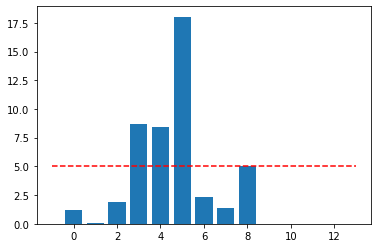

In [13]:
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.hlines(y=5,xmin=-1,xmax=13,colors='red',linestyles='dashed')
plt.show()

In [14]:
fs.pvalues_

array([2.76159837e-01, 8.56556128e-01, 1.69582161e-01, 3.65684831e-03,
       4.11610141e-03, 3.40707282e-05, 1.27468030e-01, 2.43376437e-01,
       2.62190994e-02])

In [15]:
fs.get_feature_names_out()

array(['col_3', 'col_4', 'col_5', 'col_6', 'col_8'], dtype=object)

In [16]:
for i in [chi2, f_classif, mutual_info_classif]:
    fs = SelectKBest(i, k=5)
    fs.fit_transform(X_train_enc,y_train_enc)
    print(fs.get_feature_names_out())

['col_2' 'col_3' 'col_4' 'col_5' 'col_8']
['col_3' 'col_4' 'col_5' 'col_6' 'col_8']
['col_2' 'col_4' 'col_5' 'col_6' 'col_7']


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [18]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_enc, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_enc)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Logistic with all features:  Accuracy: %.2f' % (accuracy*100))

Logistic with all features:  Accuracy: 75.79


In [19]:
fs = SelectKBest(chi2, k=5)
X_train_chi2 = fs.fit_transform(X_train_enc,y_train_enc)
X_test_chi2 = fs.transform(X_test_enc)

# Model Built Using chi2 Features
model2 = LogisticRegression(solver='liblinear', max_iter=500)
model2.fit(X_train_chi2, y_train_enc)
yhat2 = model2.predict(X_test_chi2)
accuracy2 = accuracy_score(y_test_enc, yhat2)
print('Logistic with chi2: Accuracy: %.2f' % (accuracy2*100))

Logistic with chi2: Accuracy: 72.63


In [20]:
fs = SelectKBest(f_classif, k=5)
X_train_f_classif = fs.fit_transform(X_train_enc,y_train_enc)
X_test_f_classif = fs.transform(X_test_enc)

# Model Built Using ANOVA F-test Features
model3 = LogisticRegression(solver='liblinear', max_iter=500)
model3.fit(X_train_f_classif, y_train_enc)
yhat3 = model3.predict(X_test_f_classif)
accuracy3 = accuracy_score(y_test_enc, yhat3)
print('Logistic with f-classif: Accuracy: %.2f' % (accuracy3*100))

Logistic with f-classif: Accuracy: 73.68


In [21]:
fs = SelectKBest(mutual_info_classif, k=5)
X_train_mic = fs.fit_transform(X_train_enc,y_train_enc)
X_test_mic = fs.transform(X_test_enc)

# Model Built Using Mutual Information Features
model4 = LogisticRegression(solver='liblinear', max_iter=500)
model4.fit(X_train_mic, y_train_enc)
yhat4 = model4.predict(X_test_mic)
accuracy4 = accuracy_score(y_test_enc, yhat4)
print('Logistic with Mutual Informaion: Accuracy: %.2f' % (accuracy4*100))

Logistic with Mutual Informaion: Accuracy: 70.53


In [22]:
from sklearn.model_selection import (RepeatedStratifiedKFold, 
                                     GridSearchCV, cross_val_score)

In [23]:
X_ = OrdinalEncoder().fit_transform(X)
y_ = LabelEncoder().fit_transform(y)

In [24]:
# define the pipeline to evaluate
model = LogisticRegression(solver='liblinear', max_iter=500)
fs = SelectKBest()
pipeline = Pipeline(steps=[('anova',fs), ('lr', model)])
                                     
# define the grid
grid = dict()
grid['anova__k'] = [i+1 for i in range(X.shape[1])]
grid['anova__score_func'] = [chi2, f_classif, mutual_info_classif]

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define the grid search
search = GridSearchCV(pipeline, grid, scoring='accuracy', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(X_, y_)

In [25]:
# summarize best
print('Best Mean Accuracy: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

Best Mean Accuracy: 0.746
Best Config: {'anova__k': 4, 'anova__score_func': <function f_classif at 0x000001D2C1C97280>}


>1 0.708 (0.075)
>2 0.706 (0.073)
>3 0.743 (0.057)
>4 0.744 (0.063)
>5 0.741 (0.063)
>6 0.731 (0.062)
>7 0.731 (0.062)
>8 0.729 (0.072)
>9 0.737 (0.066)


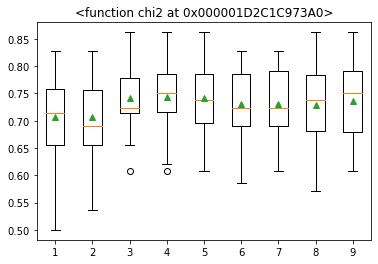

>1 0.689 (0.052)
>2 0.738 (0.055)
>3 0.743 (0.057)
>4 0.746 (0.064)
>5 0.741 (0.063)
>6 0.739 (0.061)
>7 0.738 (0.071)
>8 0.732 (0.074)
>9 0.737 (0.066)


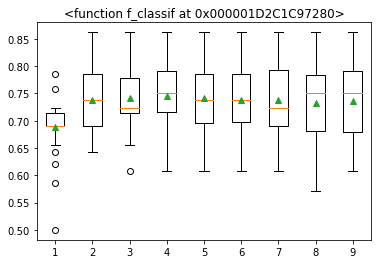

>1 0.691 (0.034)
>2 0.724 (0.052)
>3 0.724 (0.062)
>4 0.749 (0.057)
>5 0.730 (0.064)
>6 0.740 (0.056)
>7 0.739 (0.069)
>8 0.740 (0.065)
>9 0.737 (0.066)


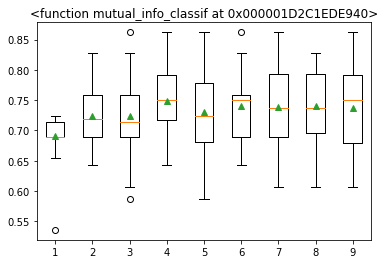

In [26]:
# evaluate a given model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X_, y_, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# define number of features to evaluate
num_features = [i+1 for i in range(X_.shape[1])]

for i in [chi2, f_classif, mutual_info_classif]:
    
    # enumerate each number of features
    results = list()
    for k in num_features:
    
        # create pipeline
        model = LogisticRegression(solver='liblinear')
        fs = SelectKBest(score_func=i, k=k)
        pipeline = Pipeline(steps=[('anova',fs), ('lr', model)])
    
        # evaluate the model
        scores = evaluate_model(pipeline)
        results.append(scores)
    
        # summarize the results
        print('>%d %.3f (%.3f)' % (k, np.mean(scores), np.std(scores)))

    # plot model performance for comparison
    plt.boxplot(results, labels=num_features, showmeans=True)
    plt.title(f'{str(i)}')
    plt.show()

<a id="eg2"></a>
<h2><ins>Example 2: Numerical Input, Categorical Output</ins></h2>

In [27]:
df1 = pd.read_csv("./datasets/Feature Selection/Diabetes.csv", header=None,
                prefix='col_')
df1.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
def load_dataset(file_path):
    # read in the dataset using pandas
    df = pd.read_csv(file_path, header=None, prefix='col_')
    # split the data into input and output variables
    X = df.values[:, :-1]
    y = df.values[:,-1]
    return X, y

# feature selection
def select_features(X_train, y_train, X_test,score_func,k):
    fs = SelectKBest(score_func=score_func, k=k)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs


# load the dataset
X, y = load_dataset("./datasets/Feature Selection/Diabetes.csv")
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=1)
# print('Train', X_train.shape, y_train.shape)
# print('Test', X_test.shape, y_test.shape)
# print('Train', X_train_enc.shape, y_train_enc.shape)
# print('Test', X_test_enc.shape, y_test_enc.shape)

# # feature selection
X_train_fs_fc, X_test_fs_fc, fs_fc = select_features(X_train, y_train, 
                                            X_test, f_classif,k=4)
X_train_fs_mi, X_test_fs_mi, fs_mi = select_features(X_train, y_train, 
                                            X_test, mutual_info_classif,k=4)

# # what are scores for the features
# for i in range(len(fs_mi.scores_)):
#     print('Feature %d: %f' % (i, fs_mi.scores_[i]))
    
# # plot the scores
# plt.bar([i for i in range(len(fs_mi.scores_))], fs_mi.scores_)
# plt.show()

# fit the model
model = LogisticRegression(solver='liblinear', max_iter=300)
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Logistic with all features: Accuracy: %.2f' % (accuracy*100))

# Model Built Using ANOVA F-test Features
model2 = LogisticRegression(solver='liblinear', max_iter=500)
model2.fit(X_train_fs_fc, y_train)
yhat2 = model2.predict(X_test_fs_fc)
accuracy2 = accuracy_score(y_test, yhat2)
print('Logistic with f-classif: Accuracy: %.2f' % (accuracy2*100))

# Model Built Using Mutual Information Features
model3 = LogisticRegression(solver='liblinear', max_iter=300)
model3.fit(X_train_fs_mi, y_train)
yhat3 = model3.predict(X_test_fs_mi)
accuracy3 = accuracy_score(y_test, yhat3)
print('Logistic with Mutual Informaion: Accuracy: %.2f' % (accuracy3*100))

Logistic with all features: Accuracy: 77.56
Logistic with f-classif: Accuracy: 78.74
Logistic with Mutual Informaion: Accuracy: 78.74


<a id="tune"></a>
<h5><ins>Tune the Number of Selected Features</ins></h5>

In the previous examples, we selected the number of features $k$ based on a visual inspection. Instead of guessing, we can systematically test a range
of different numbers of selected features and discover which results in the best performing model. This is called a grid search, where the `k` argument to the `SelectKBest` class can be tuned.
- It is good practice to evaluate model configurations on classification tasks using repeated stratified k-fold cross-validation.

In [29]:
# load the dataset
X, y = load_dataset("./datasets/Feature Selection/Diabetes.csv")

We will use three repeats of 10-fold cross-validation via the `RepeatedStratifiedKFold` class.

In [30]:
from sklearn.model_selection import (RepeatedStratifiedKFold, 
                                     GridSearchCV, cross_val_score)

In [31]:
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

We can define a Pipeline that correctly prepares the feature selection transform on the training set and applies it to the train set and test set for each fold of the cross-validation. In this case, we will use the ANOVA F-test statistical method for selecting features.

In [32]:
from sklearn.pipeline import Pipeline

In [33]:
# define the pipeline to evaluate
model = LogisticRegression(solver='liblinear')
fs = SelectKBest(score_func=f_classif)
pipeline = Pipeline(steps=[('anova',fs), ('lr', model)])

We can then define the grid of values to evaluate as 1 to 8. Note that the grid is a dictionary that maps parameter names to values to be searched. Given that we are using a Pipeline, we can access the SelectKBest object via the name we gave it, ‘anova’, and then the parameter name k, separated by two underscores, or ‘anova__k’.

In [34]:
# define the grid
grid = dict()
grid['anova__k'] = [i+1 for i in range(X.shape[1])]

In [35]:
grid

{'anova__k': [1, 2, 3, 4, 5, 6, 7, 8]}

In [36]:
# define the grid search
search = GridSearchCV(pipeline, grid, scoring='accuracy', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(X, y)

In [37]:
# summarize best
print('Best Mean Accuracy: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

Best Mean Accuracy: 0.770
Best Config: {'anova__k': 7}


We might want to see the relationship between the number of selected features and classification accuracy. In this relationship, we may expect that more features result in a better performance to a point. This relationship can be explored by manually evaluating each configuration of k for the SelectKBest from 1 to 8, gathering the sample of accuracy scores, and plotting the results using box and whisker plots side-by-side. The spread and mean of these box plots would be expected to show any interesting relationship between the number of selected features and the classification accuracy of the pipeline. 

>1 0.748 (0.048)
>2 0.756 (0.042)
>3 0.761 (0.044)
>4 0.759 (0.042)
>5 0.770 (0.041)
>6 0.766 (0.042)
>7 0.770 (0.042)
>8 0.768 (0.040)


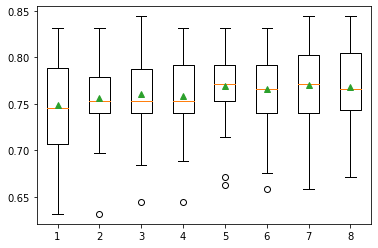

In [38]:
# evaluate a given model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# define number of features to evaluate
num_features = [i+1 for i in range(X.shape[1])]

# enumerate each number of features
results = list()
for k in num_features:
    
    # create pipeline
    model = LogisticRegression(solver='liblinear')
    fs = SelectKBest(score_func=f_classif, k=k)
    pipeline = Pipeline(steps=[('anova',fs), ('lr', model)])
    
    # evaluate the model
    scores = evaluate_model(pipeline)
    results.append(scores)
    
    # summarize the results
    print('>%d %.3f (%.3f)' % (k, np.mean(scores), np.std(scores)))

# plot model performance for comparison
plt.boxplot(results, labels=num_features, showmeans=True)
plt.show()

Box and whisker plots are created side-by-side showing the trend of increasing mean accuracy with the number of selected features to five features, after which it may become less stable. Selecting five features might be an appropriate configuration in this case.

<a id="eg3"></a>
<h5><ins>Example 3: Numerical Output</ins></h5>

In [39]:
from sklearn.datasets import load_diabetes

In [40]:
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [41]:
from sklearn.feature_selection import mutual_info_regression, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [42]:
X = df.drop(columns=['target'])
y = df['target']

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, 
                                                    random_state=1)
# # summarize
# print('Train', X_train.shape, y_train.shape)
# print('Test', X_test.shape, y_test.shape)

# feature selection
def select_features(X_train, y_train, X_test,score_func,k):
    fs = SelectKBest(score_func=score_func, k=k)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

X_train_fs_fr, X_test_fs_fr, fs_fr = select_features(X_train, y_train, X_test,
                                                     f_regression, k=6)
X_train_fs_mi, X_test_fs_mi, fs_mi = select_features(X_train, y_train, X_test,
                                                     mutual_info_regression, k=6)

# # what are scores for the features
# for i in range(len(fs.scores_)):
#     print('Feature %d: %f' % (i, fs.scores_[i]))
# # plot the scores
# plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
# plt.show()

# fit the model
full_model = LinearRegression()
full_model.fit(X_train, y_train)

# evaluate the model
yhat = full_model.predict(X_test)

# evaluate predictions
mae_full = mean_absolute_error(y_test, yhat)
print('Linear with all features: MAE - %.3f' % mae_full)

# Model Built Using Correlation Features
f_reg_model = LinearRegression()
f_reg_model.fit(X_train_fs_fr, y_train)
yhat2 = f_reg_model.predict(X_test_fs_fr)
mae_f_reg = mean_absolute_error(y_test, yhat2)
print('Linear with f-reg: MAE - %.3f' % mae_f_reg)

# Model Built Using Mutual Information Features
mi_model = LinearRegression()
mi_model.fit(X_train_fs_mi, y_train)
yhat3 = mi_model.predict(X_test_fs_mi)
mae_mi = mean_absolute_error(y_test, yhat3)
print('Linear with mutual information: MAE - %.3f' % mae_mi)

Linear with all features: MAE - 41.380
Linear with f-reg: MAE - 43.360
Linear with mutual information: MAE - 43.360


<a id="tuning"></a>
<h5><ins>Tune the Number of Selected Features</ins></h5>

In [43]:
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV, cross_val_score

In this case, we will evaluate models using the negative mean absolute error (neg mean absolute error). It is negative because the scikit-learn requires the score to be maximized, so the MAE is made negative, meaning scores scale from -infinity to 0 (best).

In [44]:
# define the evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define the pipeline to evaluate
model = LinearRegression()
fs = SelectKBest(score_func=mutual_info_regression)
pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])

# define the grid
grid = dict()
grid['sel__k'] = [i for i in range(1, X.shape[1]+1)]

# define the grid search
search = GridSearchCV(pipeline, grid, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)

# perform the search
results = search.fit(X, y)

# summarize best
print('Best MAE: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print('>%.3f with: %r' % (mean, param))

Best MAE: -44.470
Best Config: {'sel__k': 10}
>-51.888 with: {'sel__k': 1}
>-47.459 with: {'sel__k': 2}
>-47.349 with: {'sel__k': 3}
>-47.356 with: {'sel__k': 4}
>-46.413 with: {'sel__k': 5}
>-45.755 with: {'sel__k': 6}
>-45.699 with: {'sel__k': 7}
>-44.851 with: {'sel__k': 8}
>-44.543 with: {'sel__k': 9}
>-44.470 with: {'sel__k': 10}


We might want to see the relationship between the number of selected features and MAE. In this relationship, we may expect that more features result in better performance, to a point. This relationship can be explored by manually evaluating each configuration of k for the SelectKBest, gathering the sample of MAE scores, and plotting the results using box and whisker plots side by side. The spread and mean of these box plots would be expected to show any interesting relationship between the number of selected features and the MAE of the pipeline.

>1 -52.727 (1.840)
>2 -48.334 (3.450)
>3 -46.822 (1.320)
>4 -46.349 (1.358)
>5 -46.228 (0.716)
>6 -45.782 (1.480)
>7 -44.849 (1.998)
>8 -44.828 (2.084)
>9 -44.372 (2.196)
>10 -44.276 (2.100)


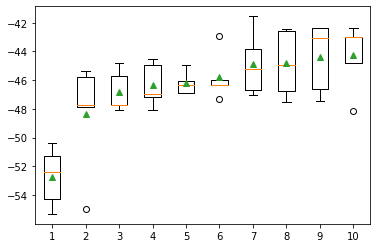

In [45]:
# define number of features to evaluate
num_features = [i for i in range(1, X.shape[1]+1)]
# enumerate each number of features
results = list()
for k in num_features:
# create pipeline
    model = LinearRegression()
    fs = SelectKBest(score_func=mutual_info_regression, k=k)
    pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
    # evaluate the model
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error',
                             n_jobs=-1)
    results.append(scores)
    # summarize the results
    print('>%d %.3f (%.3f)' % (k, np.mean(scores), np.std(scores)))

# plot model performance for comparison
plt.boxplot(results, labels=num_features, showmeans=True)
plt.show()

<a id="univariate"></a>
<h2><ins>Univariate Feature Selection With GenericUnivariateSelect</ins></h2>

Filtering is usually based on an arbitrary (or normative) threshold that allows the analyst to discard features. Some people try filtering methods where they assess each regressor’s correlation with the dependent variable or check univariate tests that evaluate the relationship between each independent regressor and the dependent variable.

In [46]:
from sklearn.datasets import load_diabetes
from sklearn.feature_selection import GenericUnivariateSelect

In [47]:
# numerical input, numerical output - regression

data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

X = df.drop(columns=['target'])
y = df['target']

<table>
<tr><th style="text-align:center">SCORING FUNCTION</th><th style="text-align:center">MODE</th></tr>
<tr><td>

|<b>SCORE_FUNC</b>|desc|<b> I/O Data Type</b>|
|:-:|:-:|:-:|
|f_classif|ANOVA$\;$F-value between<br>label/feature for classification tasks|numerical / categorical|
|chi2|Chi-squared stats of non-negative<br>features for classification tasks|categorical / categorical|
|mutual_info_classif|Mutual information<br>for a discrete target|categorical / categorical|
|f_regression|F-value between label/feature<br>for regression tasks|numerical / numerical|
|mutual_info_regression|Mutual information<br>for a continuous target|numerical / numerical|
|f_oneway|Performs a 1-way ANOVA|
    
</td><td>

|<b>PARAM</b>|desc|
|:-:|:-:|
|'percentile'|requires param<br>between 0 and 100|
|'k_best'|requires param between 1<br>and total number of features|
|'fpr', 'fdr', 'fwe'|highest p-value for<br>features to be kept|

</td></tr> </table>

In [48]:
X_gus = GenericUnivariateSelect(score_func=f_regression,
                                mode='k_best', param=5)
X_gus.fit(X,y)

GenericUnivariateSelect(mode='k_best', param=5,
                        score_func=<function f_regression at 0x000001D2C1C974C0>)

In [49]:
X_gus.feature_names_in_

array(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'],
      dtype=object)

In [50]:
X_gus.get_feature_names_out()

array(['bmi', 'bp', 's3', 's4', 's5'], dtype=object)

In [51]:
X_gus.get_support()

array([False, False,  True,  True, False, False,  True,  True,  True,
       False])

In [52]:
X.shape

(442, 10)

In [53]:
X_gus.transform(X).shape

(442, 5)

In [54]:
data = {'Scores':X_gus.scores_, 'p-values':X_gus.pvalues_}
pd.DataFrame(data=data,index=X_gus.feature_names_in_)

,Scores,p-values
age,16.101374,7.055686e-05
sex,0.817423,3.664293e-01
bmi,230.653764,3.466006e-42
bp,106.521384,1.648533e-22
s1,20.710567,6.920712e-06
s2,13.746079,2.359848e-04
s3,81.239659,6.162865e-18
s4,100.069264,2.304253e-21
s5,207.272091,8.823754e-39
s6,75.399683,7.580083e-17


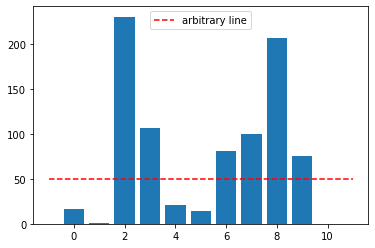

In [55]:
plt.bar([i for i in range(len(X_gus.scores_))], X_gus.scores_)
plt.hlines(y=50,xmin=-1,xmax=11,colors='red',linestyles='dashed',label='arbitrary line')
plt.legend(loc=9)
plt.show()

<a id="any"></a>
<h1 align="center">FEATURE SELECTION WITH ANY DATA TYPE</h1>

Previously, we looked at measures of statistical correlation that are specific to numerical and categorical data types. It is rare that we have a dataset with just a single input variable data type. One approach to handling different input variable data types is to separately select numerical input variables and categorical input variables using appropriate metrics. This can be achieved using the `ColumnTransformer` class.

Another data type agnostic method is to score input features using a model and use a filter-based feature selection method. Many models will automatically select features or score features as part of fitting the model and these scores can be used just like the statistical methods described above. Decision tree algorithms and ensembles of decision tree algorithms provide an input variable data type agnostic method of scoring input variables, including algorithms such as:
- Classification and Regression Trees (CART)
- Random Forest
- Bagged Decision Trees
- Gradient Boosting

Another approach is to use a wrapper method that performs a search through different combinations or subsets of input features based on the effect they have on model quality. Simple methods might create a tree of all possible combinations of input features and navigate the graph based on the pay-off, e.g. using a best-first tree searching algorithm. Alternately, a stochastic global search algorithm can be used. Although effective, these approaches can be computationally very expensive, specially for large training datasets and sophisticated models. 
- Tree-Searching Methods (depth-first, breadth-first, etc.).
- Stochastic Global Search (simulated annealing, genetic algorithm).

Simpler methods involve systematically adding or removing features from the model until no further improvement is seen. This includes so-called step-wise models (e.g. step-wise regression) and RFE as well as the method of variance thresholding. 

<a id="forward"></a>
<h5><ins>Forward Selection</ins></h5>

**Forward selection** starts with zero features, then, for each individual feature, runs a model and determines the p-value associated with the t-test or F-test performed. It then selects the feature with the lowest p-value and adds that to the working model. Next, it takes the first feature selected and runs models with a second feature added and selects the second feature with the lowest p-value. Then it takes the two features previously selected and runs models with a third feature and so on, until all features that have significant p-values are added to the model. Any features that never had a significant p-value when tried in the iterations will be excluded from the final model.
- What's the "best?" That depends entirely on the defined evaluation criteria (AUC, prediction accuracy, RMSE, etc.). 

In [56]:
import pandas as pd
import statsmodels.api as sm

def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    selected_features = []
    while True:
        remaining_features = list(set(initial_features)-set(selected_features))
        new_pval = pd.Series(index=remaining_features, dtype=float)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[selected_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_feature = new_pval.min()
        if(min_p_value<significance_level):
            selected_features.append(new_pval.idxmin())
        else:
            break
    return selected_features

<a id="backward"></a>
<h5><ins>Backward Selection</ins></h5>

**Backward selection** starts with all features contained in the dataset. It then runs a model and calculates a p-value associated with the t-test or F-test of the model for each feature. The feature with the largest insignificant p-value will then be removed from the model, and the process starts again. This continues until all features with insignificant p-values are removed from the model.

In [57]:
def step_backward(X,y, sklearn=True, significance_level=0.05):
    
    initial_features = X.columns.tolist()
    not_useful = []
    while True:
        if sklearn:
            model_lr = LinearRegression().fit(X[initial_features],y)
            data = model_lr.p
        else:
            model_ols = sm.OLS(y, sm.add_constant(X[initial_features])).fit()
            data = model_ols.pvalues[1:]
        
        pvalues = pd.Series(data=data, index=initial_features)
        highest_p, worst_col = pvalues.max(), pvalues.idxmax()
    
        if highest_p > significance_level:
            not_useful.append(worst_col)
            initial_features.remove(worst_col)
        else:
            break

    print(f'Best features are: {initial_features}')
    print(f'Non-useful features are: {not_useful}')
#     return initial_features, not_useful

<a id="stepwise"></a>
<h5><ins>Stepwise Selection</ins></h5>

**Stepwise selection** is a hybrid of forward and backward selection. It starts with zero features and adds the one feature with the lowest significant p-value as described above. Then, it goes through and finds the second feature with the lowest significant p-value. On the third iteration, it will look for the next feature with the lowest significant p-value, ***and it will also remove any features that were previously added that now have an insignificant p-value. This allows for the final model to have all of the features included be significant.***

It is similar to forward selection but the difference is while adding a new feature it also checks the significance of already added features and if it finds any of the already selected features insignificant then it simply removes that particular feature through backward elimination.

<a id="sklearn"></a>
<h5><ins>Sequential Selection using Sklearn</ins></h5>

Forward-SFS is a greedy procedure that iteratively finds the best new feature to add to the set of selected features. Concretely, we initially start with zero feature and find the one feature that maximizes a cross-validated score when an estimator is trained on this single feature. Once that first feature is selected, we repeat the procedure by adding a new feature to the set of selected features. The procedure stops when the desired number of selected features is reached, as determined by the n_features_to_select parameter.

Backward-SFS follows the same idea but works in the opposite direction: instead of starting with no feature and greedily adding features, we start with all the features and greedily remove features from the set. The direction parameter controls whether forward or backward SFS is used.

In general, forward and backward selection do not yield equivalent results. Also, one may be much faster than the other depending on the requested number of selected features: if we have 10 features and ask for 7 selected features, forward selection would need to perform 7 iterations while backward selection would only need to perform 3.

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SequentialFeatureSelector

In [59]:
X, y = load_iris(return_X_y=True)

knn = KNeighborsClassifier(n_neighbors=4)
sfs = SequentialFeatureSelector(knn, n_features_to_select=3,
                               scoring='accuracy', cv=10)
new_data = sfs.fit_transform(X,y)

print(sfs.direction)
sfs.get_feature_names_out()

forward


array(['x0', 'x2', 'x3'], dtype=object)

In [60]:
X, y = load_iris(return_X_y=True)

knn = KNeighborsClassifier(n_neighbors=4)
sfs = SequentialFeatureSelector(knn, n_features_to_select=3,
                                scoring='accuracy', direction='backward')
new_data = sfs.fit_transform(X,y)

print(sfs.direction)
sfs.get_feature_names_out()

backward


array(['x1', 'x2', 'x3'], dtype=object)

<a id="mlxtend"></a>
<h5><ins>Sequential Selection using mlxtend</ins></h5>

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

iris = load_iris()
X = iris.data
y = iris.target
knn = KNeighborsClassifier(n_neighbors=4)

In [62]:
# Sequential Forward Selection
sfs = SFS(knn, k_features=3, forward=True, floating=False, 
          scoring='accuracy', cv=5, n_jobs=-1)

sfs = sfs.fit(X, y, custom_feature_names=iris.feature_names)

print('\nSequential Forward Selection (k=3):')
print(sfs.k_feature_idx_)
print(sfs.k_feature_names_)
print('CV Score:')
print(sfs.k_score_)

###################################################

# Sequential Backward Selection
sbs = SFS(knn, k_features=3, forward=False, floating=False, 
          scoring='accuracy', cv=4, n_jobs=-1)

sbs = sbs.fit(X, y, custom_feature_names=iris.feature_names)

print('\nSequential Backward Selection (k=3):')
print(sbs.k_feature_idx_)
print(sbs.k_feature_names_)
print('CV Score:')
print(sbs.k_score_)

###################################################

# Sequential Forward Floating Selection
sffs = SFS(knn, k_features=3, forward=True, floating=True, 
           scoring='accuracy', cv=4, n_jobs=-1)

sffs = sffs.fit(X, y, custom_feature_names=iris.feature_names)

print('\nSequential Forward Floating Selection (k=3):')
print(sffs.k_feature_idx_)
print(sffs.k_feature_names_)
print('CV Score:')
print(sffs.k_score_)

###################################################

# Sequential Backward Floating Selection
sbfs = SFS(knn, k_features=3, forward=False, floating=True, 
           scoring='accuracy', cv=4, n_jobs=-1)

sbfs = sbfs.fit(X, y, custom_feature_names=iris.feature_names)

print('\nSequential Backward Floating Selection (k=3):')
print(sbfs.k_feature_idx_)
print(sbfs.k_feature_names_)
print('CV Score:')
print(sbfs.k_score_)


Sequential Forward Selection (k=3):
(0, 2, 3)
('sepal length (cm)', 'petal length (cm)', 'petal width (cm)')
CV Score:
0.9533333333333334

Sequential Backward Selection (k=3):
(1, 2, 3)
('sepal width (cm)', 'petal length (cm)', 'petal width (cm)')
CV Score:
0.9731507823613088

Sequential Forward Floating Selection (k=3):
(1, 2, 3)
('sepal width (cm)', 'petal length (cm)', 'petal width (cm)')
CV Score:
0.9731507823613088

Sequential Backward Floating Selection (k=3):
(1, 2, 3)
('sepal width (cm)', 'petal length (cm)', 'petal width (cm)')
CV Score:
0.9731507823613088


In [63]:
sfs.subsets_

{1: {'feature_idx': (3,),
  'cv_scores': array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ]),
  'avg_score': 0.96,
  'feature_names': ('petal width (cm)',)},
 2: {'feature_idx': (2, 3),
  'cv_scores': array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ]),
  'avg_score': 0.9666666666666668,
  'feature_names': ('petal length (cm)', 'petal width (cm)')},
 3: {'feature_idx': (0, 2, 3),
  'cv_scores': array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 0.96666667]),
  'avg_score': 0.9533333333333334,
  'feature_names': ('sepal length (cm)',
   'petal length (cm)',
   'petal width (cm)')}}

In [64]:
# convert results into a dataframe
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(3,)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(petal width (cm),)",0.032061,0.024944,0.012472
2,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.966667,"(petal length (cm), petal width (cm))",0.027096,0.021082,0.010541
3,"(0, 2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.953333,"(sepal length (cm), petal length (cm), petal w...",0.020989,0.01633,0.008165


The ci_bound column in the DataFrame above represents the confidence interval around the computed cross-validation scores. By default, a confidence interval of 95% is used, but we can use different confidence bounds via the confidence_interval parameter.

In [65]:
pd.DataFrame.from_dict(sfs.get_metric_dict(confidence_interval=0.90)).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(3,)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(petal width (cm),)",0.025132,0.024944,0.012472
2,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.966667,"(petal length (cm), petal width (cm))",0.02124,0.021082,0.010541
3,"(0, 2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.953333,"(sepal length (cm), petal length (cm), petal w...",0.016453,0.01633,0.008165


We can also visualize the results using matplotlib figures.

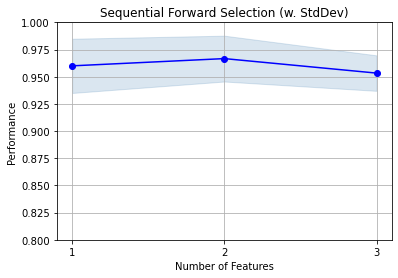

In [66]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

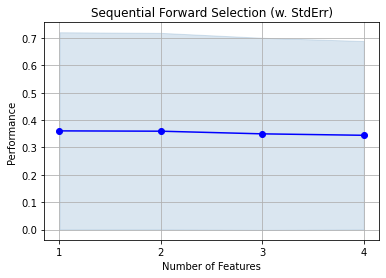

In [67]:
# Sequential Forward Selection
sfs1 = SFS(LinearRegression(), k_features=(1,4), forward=True, floating=False, 
          cv=4, n_jobs=-1)

sfs1 = sfs1.fit(X, y)

fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

Similar to the classification examples above, the SequentialFeatureSelector also supports scikit-learn's estimators for regression.

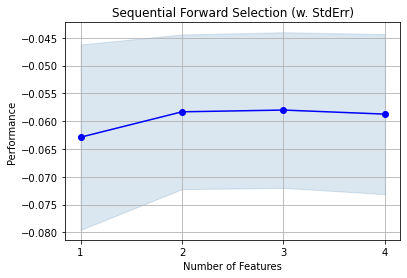

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

# boston = load_boston()
# X, y = boston.data, boston.target

lr = LinearRegression()

sfs = SFS(lr, 
          k_features=4, 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=10)

sfs = sfs.fit(X, y,custom_feature_names=iris.feature_names)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

<a id="threshold"></a>
<h5><ins>Variance Thresholding</ins></h5>

Another filter method of feature reduction is **variance thresholding**. The variance of a feature determines how much predictive power it contains. The lower the variance is, the less information contained in the feature, and the less value it has in predicting the response variable. Given this fact, variance thresholding is done by finding the variance of each feature, and then dropping all of the features below a certain variance threshold. This threshold could be 0 if you only want to remove features that have the same value for each instance of the response variable. However, to remove more features from your dataset, the threshold could be set to 0.5, 0.3, 0.1, or another value that makes sense for the distribution of variances.

In [69]:
from sklearn.feature_selection import VarianceThreshold

def variance_threshold_selector(data, names_only=True, threshold=0.5):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    selected_columns = data.columns[selector.get_support(indices=True)]
    
    if names_only:
        return selected_columns
    else:
        return data[selected_columns]

<a id="rfe"></a>
<h1 align="center">RECURSIVE FEATURE ELIMINATION (RFE)</h1>

The basic feature selection methods discussed so far are mostly about individual properties of features and how they interact with each other. Variance thresholding and pairwise feature selection are a few examples that remove unnecessary features based on variance and the correlation between them. However, a more pragmatic approach would select features based on how they affect a particular model’s performance. One such technique is **Recursive Feature Elimination (RFE)** whereby the objective is to reduce model complexity by removing features one by one until the optimal number of features is left.

RFE is a popular feature selection algorithm because it is easy to configure and use, and because it is effective at selecting those features (columns) in a training dataset that are more or most relevant in predicting the target variable. There are two important configuration options when using RFE: 
1. the choice in the number of features to select, and
2. the choice of the algorithm used to help choose features
>**Both of these hyperparameters can be explored, although the performance of the method is not strongly dependent on these hyperparameters being configured well.**

Technically, RFE is a wrapper-style feature selection algorithm that also uses filter-based feature selection internally. This means that a different machine learning algorithm is given and used in the core of the method, then wrapped by RFE, and used to help select the best possible set of features that gives the highest performance. This is in contrast to filter-based feature selections that score each feature and select those features with the largest (or smallest) score.

RFE works by searching for a subset of features by starting with all features in the training dataset and successfully removing features until the desired number remains. This is achieved by fitting the given machine learning algorithm used in the core of the model, ranking features by importance, discarding the least important features, and re-fitting the model. This process is repeated until a specified number of features remains. 
- Features are scored either using the provided machine learning model (e.g. some algorithms like decision trees offer importance scores) or by using a statistical method.
- It is common to use k-fold cross-validation to evaluate a machine learning algorithm on a dataset. When using cross-validation, it is good practice to perform data transforms like RFE as part of a Pipeline to avoid data leakage.
>***Since RFE trains the given model on the full dataset every time it drops a feature, the computation time will be heavy for large datasets with many features. To control this behavior, RFE provides `step` parameter that lets us drop an arbitrary number of features in each iteration instead of one.***

<a id="basic"></a>
<h5><ins>Basic Outline for RFE & RFECV</ins></h5>

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [71]:
df = pd.read_csv('./datasets/Feature Selection/ansur_male.csv')

# df._get_numeric_data()
# df.select_dtypes(include='number')
df_num = df.select_dtypes(include=np.number)

# Feature, target arrays
X, y = df_num.iloc[:, :-1], df_num.iloc[:, -1]

# Train/test set generation
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=1)

# Scale train and test sets with StandardScaler
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

# Init, fit, test score
model_full = RandomForestRegressor()
model_full.fit(X_train_std, y_train)
model_full.score(X_test_std, y_test)

0.9437832211739067

In [72]:
# coefficients for the Random Forest Regressor model
pd.DataFrame(
    zip(X_train.columns, abs(model_full.feature_importances_)),
    columns=["feature", "weight"],
).sort_values("weight").reset_index(drop=True)

,feature,weight
0,DODRace,0.000091
1,SubjectNumericRace,0.000134
2,lateralfemoralepicondyleheight,0.000175
3,Heightin,0.000176
4,waistheightomphalion,0.000192
...,...,...
93,wristheight,0.001771
94,bicepscircumferenceflexed,0.002102
95,forearmcircumferenceflexed,0.003056
96,bideltoidbreadth,0.004810


To reduce model complexity, always start by removing features with a weight close to 0. Since all weights are multiplied by the values of features, such small weights contribute very little to the overall predictions. Looking at the above weights, we can see that many weights are close to 0.

We could set a low threshold and filter out features based on it. But we have to remember that even removing a single feature forces other coefficients to change. So, we have to eliminate them step-by-step, leaving out the lowest weighted feature by sorting the fitted model coefficients. Doing this manually for 98 features would be cumbersome, but thankfully Sklearn provides us with Recursive Feature Elimination.

In [73]:
from sklearn.feature_selection import RFE

# Init the transformer
rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=10,step=10)
rfe.fit(X_train_std, y_train)

RFE(estimator=RandomForestRegressor(), n_features_to_select=10, step=10)

In [74]:
print("Num Features: %d" % rfe.n_features_,'\n')
print("Selected Features: %s" % rfe.support_,'\n')
print("Feature Ranking: %s" % rfe.ranking_)

Num Features: 10 

Selected Features: [False False False False False False False False False  True False  True
 False False False  True False False False False False False False False
 False False False False False False False False  True  True False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False  True  True  True False False
 False False] 

Feature Ranking: [ 9  8  8  9  7 10  8  7  7  1  5  1  7  5  3  1  4  4  9  4  2  7  8  5
  2  6 10  8  3  4  9  5  1  1  6  7  5  4  1  2  9  6  8  8  9  9  7  3
  8  3  4  2  8  4  3  3 10  6 10  6  4  3  2  6  6  9  6  7  1  9  7  3
  4  9  2  2 10  8  7  3  5 10  5  4  6  3  2  5  5  5 10  1  1  1 10 10
  6 10]


In [75]:
X_train.loc[:, rfe.support_]

,bicepscircumferenceflexed,bideltoidbreadth,bizygomaticbreadth,earprotrusion,elbowrestheight,forearmcircumferenceflexed,shouldercircumference,weightkg,wristcircumference,wristheight
816,342,502,148,27,250,295,1168,846,165,856
1956,357,521,141,21,247,311,1180,983,180,898
1379,357,521,140,24,241,315,1176,822,185,843
1412,381,529,140,24,281,293,1163,889,170,825
3039,347,538,141,23,238,312,1225,882,171,853
...,...,...,...,...,...,...,...,...,...,...
3839,346,482,140,24,239,318,1146,733,184,817
1096,386,549,145,27,268,331,1254,985,182,902
3980,352,515,138,19,217,327,1178,821,181,785
235,383,473,128,22,218,328,1139,718,171,755


Using this smaller subset to test Random Forest Regressor once again.

In [76]:
rfe.transform(X_train_std).shape

(2857, 10)

In [77]:
model_fs = RandomForestRegressor()
model_fs.fit(rfe.transform(X_train_std), y_train)
model_fs.score(rfe.transform(X_test_std), y_test)

0.9440920617089974

Even after dropping almost 89 features, we got the same score which is very impressive.

<a id="auto"></a>
<ins>Choosing the number of features to keep automatically</ins><br>
The most important hyperparameters of RFE are estimator and n_features_to_select. We arbitrarily chose 10 features and hoped for the best. However, as RFE can be wrapped around any model, we have to choose the number of relevant features based on their performance.

To achieve this, Sklearn provides a similar RFECV class which implements Recursive Feature Elimination with cross-validation and automatically finds the optimal number of features to keep. In this example, we will be using Linear regression because we can guess there will be a linear correlation between body measurements. Besides, combined with cross-validation, Random Forest Regressor will become more computationally expensive. 

In [78]:
from sklearn.feature_selection import RFECV

# Init, fit
rfecv = RFECV(estimator=LinearRegression(), min_features_to_select=5,
              step=5, n_jobs=-1, scoring="r2", cv=5)
rfecv.fit(X_train_std, y_train)

RFECV(cv=5, estimator=LinearRegression(), min_features_to_select=5, n_jobs=-1,
      scoring='r2', step=5)

In [79]:
X_train.columns[rfecv.support_]

Index(['bideltoidbreadth', 'crotchlengthomphalion', 'kneeheightsitting',
       'shouldercircumference', 'waistbreadth', 'waistcircumference',
       'waistheightomphalion', 'weightkg'],
      dtype='object')

Let's now train the model only on these 8 features and look at its performance.

In [80]:
lr = LinearRegression()
lr.fit(rfecv.transform(X_train_std), y_train)
lr.score(rfecv.transform(X_test_std), y_test)

0.9493073153977724

Even after dropping 91 features, we still got an impressive score.

<a id="rfe_cla"></a>
<h5><ins>RFE for Classification: Numerical Input, Categorical Output</ins></h5>

In [81]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

In [82]:
def load_dataset(file_path):
    # read in the dataset using pandas
    df = pd.read_csv(file_path, header=None, prefix='col_')
    # split the data into input and output variables
    X = df.values[:, :-1]
    y = df.values[:,-1]
    return X, y

X, y = load_dataset("./datasets/Feature Selection/Diabetes.csv")

# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=7)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f +-(%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.694 +-(0.054)


In [83]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=1)


# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=7)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# fit the model on all available data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('s',
                 RFE(estimator=DecisionTreeClassifier(),
                     n_features_to_select=7)),
                ('m', DecisionTreeClassifier())])

In [84]:
y_hat = pipeline.predict(X_test)
accuracy = accuracy_score(y_test,y_hat)
print(f'Accuracy score is {accuracy}')

Accuracy score is 0.683982683982684


In [85]:
rfecv = RFECV(estimator=DecisionTreeClassifier(), min_features_to_select=5,
              step=1, n_jobs=-1, scoring="r2", cv=5)
X_train_rfecv = rfecv.fit_transform(X_train,y_train)
X_test_rfecv = rfecv.transform(X_test)

model = DecisionTreeClassifier()
model.fit(X_train_rfecv,y_train)

y_hat_ = model.predict(X_test_rfecv)
accuracy = accuracy_score(y_test,y_hat_)
print(f'Accuracy score is {accuracy}')

Accuracy score is 0.6666666666666666


In [86]:
rfecv.get_feature_names_out()

array(['x1', 'x2', 'x5', 'x6', 'x7'], dtype=object)

In [87]:
rfecv = RFECV(estimator=DecisionTreeClassifier(), min_features_to_select=7,
              step=1, n_jobs=-1, scoring="r2", cv=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('cv',rfecv),('m',model)])
pipeline.fit(X_train, y_train)
y_hat = pipeline.predict(X_test)
accuracy = accuracy_score(y_test,y_hat)
print(f'Accuracy score is {accuracy}')

Accuracy score is 0.6883116883116883


In [88]:
pipeline.steps[0][1].get_feature_names_out()

array(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7'], dtype=object)

<a id="rfe_reg"></a>
<h5><ins>RFE for Regression: Numerical Input, Numerical Output</ins></h5>

In [89]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

In [90]:
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

X = df.drop(columns=['target'])
y = df['target']

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=1)

In [91]:
# create pipeline
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=7)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, 
                           scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# report performance
print('MAE: %.3f +- (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: -63.169 +- (7.763)


We can also use the RFE as part of the final model and make predictions for regression.

In [92]:
from sklearn.metrics import r2_score

In [93]:
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# fit the model on all available data
pipeline.fit(X_train, y_train)
# make a prediction for one example
yhat = pipeline.predict(X_test)
mae = mean_absolute_error(y_test,yhat)
print(f'MAE: {mae}')
print(f'score: {r2_score(y_test,yhat)}')

MAE: 63.21052631578947
score: -0.2774834830772144


In [94]:
pipeline.score(X_test,y_test)

-0.2774834830772144

<a id="hyper"></a>
<h5><ins>RFE Hyperparameters</ins></h5>

We will now look at some of the hyperparameters that should be considered when 
tuning the RFE for feature selection and their effect on model performance.

<a id="explore"></a>
<ins>Explore Number of Features</ins><br>
An important hyperparameter for the RFE algorithm is the number of features to select. Previously, we used an arbitrary number of selected features. In practice, we cannot know the best number of features to select with RFE; instead, it is good practice to test different values. For this example, we will use a classification dataset from sklearn.

In [95]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

In [96]:
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=10,
                               n_informative=5, n_redundant=5, random_state=1)
    return X, y

# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(2, 10):
        rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
        model = DecisionTreeClassifier()
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [97]:
# define dataset
X, y = get_dataset()

In [98]:
# get the models to evaluate
models = get_models()

In [99]:
models

{'2': Pipeline(steps=[('s',
                  RFE(estimator=DecisionTreeClassifier(),
                      n_features_to_select=2)),
                 ('m', DecisionTreeClassifier())]),
 '3': Pipeline(steps=[('s',
                  RFE(estimator=DecisionTreeClassifier(),
                      n_features_to_select=3)),
                 ('m', DecisionTreeClassifier())]),
 '4': Pipeline(steps=[('s',
                  RFE(estimator=DecisionTreeClassifier(),
                      n_features_to_select=4)),
                 ('m', DecisionTreeClassifier())]),
 '5': Pipeline(steps=[('s',
                  RFE(estimator=DecisionTreeClassifier(),
                      n_features_to_select=5)),
                 ('m', DecisionTreeClassifier())]),
 '6': Pipeline(steps=[('s',
                  RFE(estimator=DecisionTreeClassifier(),
                      n_features_to_select=6)),
                 ('m', DecisionTreeClassifier())]),
 '7': Pipeline(steps=[('s',
                  RFE(estimator=DecisionTr

In [100]:
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

>2 0.720 (0.044)
>3 0.826 (0.033)
>4 0.872 (0.033)
>5 0.887 (0.030)
>6 0.888 (0.026)
>7 0.888 (0.026)
>8 0.882 (0.028)
>9 0.888 (0.028)


In this case, we can see that performance improves as the number of features increase and perhaps peaks around 5-to-7 as we might expect, given that only five features are relevant to the target variable.

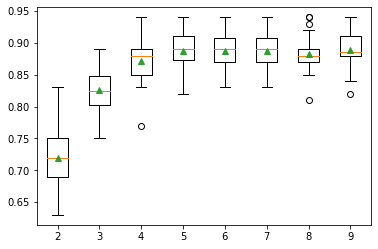

In [101]:
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

<a id="which"></a>
<ins>Which Features Were Selected With RFE</ins><br>
When using RFE, we may be interested to know which features were selected and which were removed. This can be achieved by reviewing the attributes of the fit RFE object (or fit RFECV object). The support attribute reports true or false as to which features in order of column index were included and the ranking attribute reports the relative ranking of features in the same order. The example below fits an RFE model on the whole dataset and selects five features, then reports each feature column index (0 to 9), whether it was selected or not (True or False), and the relative feature ranking.

In [102]:
# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)

# fit RFE
rfe.fit(X, y)

# summarize all features
for i in range(X.shape[1]):
    print(f'Column: {i}, Selected={rfe.support_[i]}, Rank: {rfe.ranking_[i]}')

Column: 0, Selected=False, Rank: 4
Column: 1, Selected=False, Rank: 5
Column: 2, Selected=True, Rank: 1
Column: 3, Selected=True, Rank: 1
Column: 4, Selected=True, Rank: 1
Column: 5, Selected=False, Rank: 6
Column: 6, Selected=True, Rank: 1
Column: 7, Selected=False, Rank: 2
Column: 8, Selected=True, Rank: 1
Column: 9, Selected=False, Rank: 3


<a id="explore"></a>
<ins>Automatically Select the Number of Features With RFECV</ins><br>
It is also possible to automatically select the number of features chosen by RFE. This can be achieved by performing cross-validation evaluation of different numbers of features as we did in the previous section and automatically selecting the number of features that resulted in the best mean score. The `RFECV` class implements this.

The RFECV is configured just like the RFE class regarding the choice of the algorithm that is wrapped. Additionally, the minimum number of features to be considered can be specified via the `min_features_to_select argument` (defaults to 1) and we can also specify the type of cross-validation and scoring to use via the cv (defaults to 5) and scoring arguments (uses accuracy for classification).

In [103]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline

In [104]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=10,
                           n_informative=5, n_redundant=5, random_state=1)
# create pipeline
rfe = RFECV(estimator=DecisionTreeClassifier())
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', n_jobs=-1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.887 (0.026)


In this case, we can see the RFECV useing a decision tree model to automatically select the number of features and then fits a decision tree on the selected features. This achieves a classification accuracy of about 88.7 percent.

<a id="which2"></a>
<ins>Which Features Were Selected with RFECV</ins>

In [105]:
# define RFECV
cv1 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
rfecv = RFECV(estimator=DecisionTreeClassifier(), cv=cv1)
# fit RFE
rfecv.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
    print(f'Column: {i}, Selected={rfecv.support_[i]}, Rank: {rfecv.ranking_[i]}')

Column: 0, Selected=False, Rank: 4
Column: 1, Selected=False, Rank: 3
Column: 2, Selected=True, Rank: 1
Column: 3, Selected=True, Rank: 1
Column: 4, Selected=True, Rank: 1
Column: 5, Selected=False, Rank: 5
Column: 6, Selected=True, Rank: 1
Column: 7, Selected=False, Rank: 2
Column: 8, Selected=True, Rank: 1
Column: 9, Selected=True, Rank: 1


<a id="base"></a>
<ins>Explore Base Algorithm</ins><br>
There are many algorithms that can be used in the core RFE, as long as they provide some indication of variable importance. Most decision tree algorithms are likely to report the same general trends in feature importance, but this is not guaranteed. It might be helpful to explore the use of different algorithms wrapped by RFE.

In [106]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

In [107]:
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=10,
                               n_informative=5, n_redundant=5, random_state=1)
    return X, y

# get a list of models to evaluate
def get_models():
    models = dict()
    
    # lr
    rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    # perceptron
    rfe = RFE(estimator=Perceptron(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['per'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    # cart
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    # rf
    rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    # gbm
    rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [108]:
# define dataset
X, y = get_dataset()

In [109]:
# get the models to evaluate
models = get_models()

In [110]:
models

{'lr': Pipeline(steps=[('s',
                  RFE(estimator=LogisticRegression(), n_features_to_select=5)),
                 ('m', DecisionTreeClassifier())]),
 'per': Pipeline(steps=[('s', RFE(estimator=Perceptron(), n_features_to_select=5)),
                 ('m', DecisionTreeClassifier())]),
 'cart': Pipeline(steps=[('s',
                  RFE(estimator=DecisionTreeClassifier(),
                      n_features_to_select=5)),
                 ('m', DecisionTreeClassifier())]),
 'rf': Pipeline(steps=[('s',
                  RFE(estimator=RandomForestClassifier(),
                      n_features_to_select=5)),
                 ('m', DecisionTreeClassifier())]),
 'gbm': Pipeline(steps=[('s',
                  RFE(estimator=GradientBoostingClassifier(),
                      n_features_to_select=5)),
                 ('m', DecisionTreeClassifier())])}

>lr 0.896 (0.029)
>per 0.848 (0.040)
>cart 0.882 (0.036)
>rf 0.855 (0.040)
>gbm 0.889 (0.030)


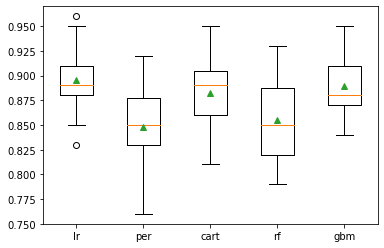

In [111]:
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

    # plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

A box and whisker plot is created for the distribution of accuracy scores for each configured wrapped algorithm. We can see the general trend of good performance with logistic regression, CART and GBM. This highlights that even though the actual model used to fit the chosen features is the same in each case, the model used within RFE can make an important difference to which features are selected and in turn the performance on the prediction problem.

In [112]:
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=10,
                               n_informative=5, n_redundant=5, random_state=1)
    return X, y

# get a list of models to evaluate
def get_cv_models():
    models = dict()
    
    model_dict = {'lr':LogisticRegression(), 'per':Perceptron(),
                 'cart':DecisionTreeClassifier(), 'rf':RandomForestClassifier(),
                 'gbm':GradientBoostingClassifier()}
    
    for name,mod in model_dict.items():
        rfecv = RFECV(estimator=mod, min_features_to_select=3,
                      step=1, scoring="accuracy", cv=5 )
        model = DecisionTreeClassifier()
        models[name] = Pipeline(steps=[('rfecv',rfecv),('m', model)])
        
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# define dataset
X_, y_ = get_dataset()

# get the models to evaluate
models = get_cv_models()

In [113]:
models

{'lr': Pipeline(steps=[('rfecv',
                  RFECV(cv=5, estimator=LogisticRegression(),
                        min_features_to_select=3, scoring='accuracy')),
                 ('m', DecisionTreeClassifier())]),
 'per': Pipeline(steps=[('rfecv',
                  RFECV(cv=5, estimator=Perceptron(), min_features_to_select=3,
                        scoring='accuracy')),
                 ('m', DecisionTreeClassifier())]),
 'cart': Pipeline(steps=[('rfecv',
                  RFECV(cv=5, estimator=DecisionTreeClassifier(),
                        min_features_to_select=3, scoring='accuracy')),
                 ('m', DecisionTreeClassifier())]),
 'rf': Pipeline(steps=[('rfecv',
                  RFECV(cv=5, estimator=RandomForestClassifier(),
                        min_features_to_select=3, scoring='accuracy')),
                 ('m', DecisionTreeClassifier())]),
 'gbm': Pipeline(steps=[('rfecv',
                  RFECV(cv=5, estimator=GradientBoostingClassifier(),
                 

>lr 0.891 (0.028)
>per 0.864 (0.041)
>cart 0.881 (0.026)
>rf 0.888 (0.023)
>gbm 0.889 (0.031)


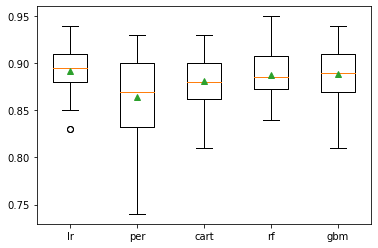

In [114]:
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_, y_)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

    # plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

<a id="yellow"></a>
<h5><ins>RFECV with `Yellowbrick`</ins></h5>

Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached. Features are ranked by the model’s `coef_` or `feature_importances_` attributes. By recursively eliminating a small number of features per loop, RFE attempts to eliminate dependencies and collinearity that may exist in the model.

RFE requires a specified number of features to keep, however it is often not known in advance how many features are valid. To find the optimal number of features cross-validation is used with RFE to score different feature subsets and select the best scoring collection of features. `Yellowbricks` RFECV visualizer plots the number of features in the model along with their cross-validated test score and variability and visualizes the selected number of features.

- Selects the best subset of features for the supplied estimator by removing 0 to N features (where N is the number of features) using recursive feature elimination, then selecting the best subset based on the cross-validation score of the model. Recursive feature elimination eliminates n features from a model by fitting the model multiple times and at each step, removing the weakest features, determined by either the `coef_` or `feature_importances_` attribute of the fitted model.


- The visualization plots the score relative to each subset and shows trends in feature elimination. If the feature elimination CV score is flat, then potentially there are not enough features in the model. An ideal curve is when the score jumps from low to high as the number of features removed increases, then slowly decreases again from the optimal number of features.

In [115]:
from sklearn.svm import SVC
from yellowbrick.model_selection import RFECV

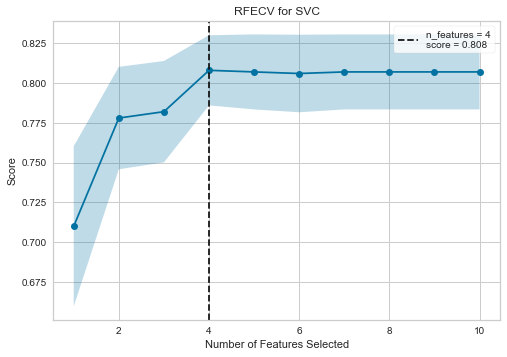

<AxesSubplot:title={'center':'RFECV for SVC'}, xlabel='Number of Features Selected', ylabel='Score'>

In [116]:
X, y = make_classification(n_samples=1000, n_features=10,
                           n_informative=5, n_redundant=5, random_state=1)

# Instantiate RFECV visualizer with a linear SVM classifier
visualizer = RFECV(SVC(kernel='linear', C=1))

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [117]:
from sklearn.model_selection import StratifiedKFold

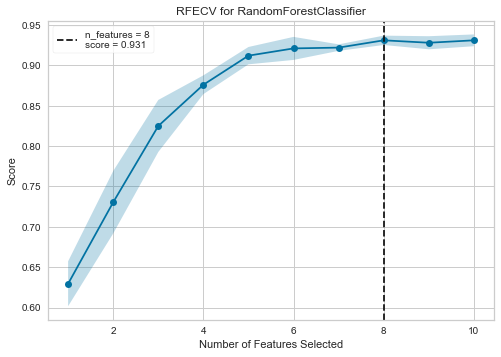

<AxesSubplot:title={'center':'RFECV for RandomForestClassifier'}, xlabel='Number of Features Selected', ylabel='Score'>

In [118]:
cv = StratifiedKFold(5)
visualizer = RFECV(RandomForestClassifier(), cv=cv, scoring='f1_weighted')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

<a id="importance"></a>
<h3 align="center">HOW TO USE FEATURE IMPORTANCE</h3>

Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable. There are many types and sources of feature importance scores, although popular examples include statistical correlation scores, coefficients calculated as part of linear models, decision trees, and permutation importance scores. Feature importance scores play an important role in a predictive modeling project, including providing insight into the data, insight into the model, and the basis for dimensionality reduction and feature selection that can improve the efficiency and effectiveness of a predictive model on the problem.

<a id="fi"></a>
<h5><ins>What is Feature Importance?</ins></h5>

Feature importance refers to a class of techniques for assigning scores to input features to a predictive model that indicates the relative importance of each feature when making a prediction. Feature importance scores can be calculated for problems that involve predicting a numerical value, called regression, and those problems that involve predicting a class label, called classification. The scores are useful and can be used in a range of situations in a predictive modeling problem, such as:
- **Better understanding the data** - Feature importance scores can provide insight into the dataset. The relative scores can highlight which features may be most relevant to the target, and the converse, which features are the least relevant. This may be interpreted by a domain expert and could be used as the basis for gathering more or different data.
- **Better understanding a model** - Feature importance scores can provide insight into the model. Most feature importance scores are calculated by a predictive model that has been fit on the dataset. Inspecting the importance score provides insight into that specific model and which features are the most important and least important to the model when making a prediction. This is a type of model interpretation that can be performed for those models that support it.
- **Reducing the number of input features** - Feature importance can be used to improve a predictive model. This can be achieved by using the importance scores to select those features to delete (lowest scores) or those features to keep (highest scores). This is a type of feature selection and can simplify the problem that is being modeled, speed up the modeling process (deleting features is called dimensionality reduction), and in some cases, improve the performance of the model.

Feature importance scores can be fed to a wrapper model, such as the `SelectFromModel` class, to perform feature selection. Each feature importance technique has the potential to rank the importance of input features differently, creating a different view on the data. As such, there is no best feature importance technique. If the goal is to find the subset of input features that result in the best model performance, then a suite of different feature selection techniques should be tried including different feature importance methods. There are many ways to calculate feature importance scores and many models that can be used for this purpose. Nevertheless, the scores between feature importance methods cannot be compared directly. Instead, the scores for each input variable are relative to each other for a given method.

<a id="coeff"></a>
<h5><ins>Coefficients as Feature Importance</ins></h5>

Linear machine learning algorithms fit a model where the prediction is the weighted sum of the input values. Examples include **linear regression**, **logistic regression**, and extensions that add regularization, such as **ridge regression**, **LASSO**, and the **elastic net**. All of these algorithms find a set of coefficients to use in the weighted sum in order to make a prediction. These coefficients can be used directly as a crude type of feature importance score.***This assumes that the input variables have the same
scale or have been scaled prior to fitting a model.***

<a id="ridge"></a>
<h5><ins>A Note on Ridge, Lasso & Decision Trees</ins></h5>

Occasionally you may want to keep all the features in your final model, but you don’t want the model to focus too much on any one coefficient. **Ridge Regression** can do this by penalizing the beta coefficients of a model for being too large. *Basically, it scales back the strength of correlation with variables that may not be as important as others*. This takes care of any multicollinearity (relationships among features that will inflate their betas) that may be present in your data. **Ridge Regression is done by adding a penalty term (also called ridge estimator or shrinkage estimator) to the cost function of the regression. The penalty term takes all of the betas and scales them by a term lambda (λ)** that must be tuned (usually with cross validation: compares the same model but with different values of lambda). Lambda is a value between 0 and infinity, although it is good to start with values between 0 and 1. 
- The higher the value of lambda, the more the coefficients are shrunk (i.e. more restriction on the coefficients).
- When lambda is equal to 0, the result will be a regular ordinary least squares model with no penalty.

<a id="lasso"></a>
**Lasso Regression** is another way to penalize the beta coefficients in a model, and is very similar to Ridge regression. It also adds a penalty term to the cost function of a model, with a lambda value that must be tuned. **The most important distinction from Ridge regression is that Lasso Regression can force the Beta coefficient to zero, which will remove that feature from the model.** This is why Lasso is preferred at times, especially when you are looking to reduce model complexity. The smaller number of features a model has, the lower the complexity. *In order to force the coefficients to zero, the penalty term added to the cost function takes the absolute value of the beta terms instead of squaring it, which when trying to minimize the cost, can negate the rest of the function, leading to a beta equal to zero.*

<a id="decision"></a>
Another common way to model data with feature selection is called **Decision Tree**, which can either be a regression tree or classification tree depending on whether the response variable is continuous or discrete, respectively. This method creates splits in the tree based on certain features to create an algorithm to find the correct response variable. The way the tree is built uses a wrapper method inside an embedded method. What we mean by that is, when making the tree model, the function has several feature selection methods built into it. At each split, the function used to create the tree tries all possible splits for all the features and chooses the one that splits the data into the most homogenous groups. In plain terms, it chooses the feature that can best predict what the response variable will be at each point in the tree. This is a wrapper method since it tries all possible combinations of features and then picks the best one.
- The most important features in predicting the response variable are used to make splits near the root (start) of the tree, and the more irrelevant features aren’t used to make splits until near the nodes of the tree (ends). In this way, decision tree penalizes features that are not helpful in predicting the response variable (embedded method). After a tree has been made, there is an option to go back and ‘prune’ some of the nodes that do not provide any additional information to the model. This prevents overfitting, and is usually done through cross validation with a holdout test set.

<a id="lr"></a>
<ins>Linear Regression Feature Importance</ins>

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

Feature: 0, Score: -0.00000
Feature: 1, Score: 12.44483
Feature: 2, Score: 0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: 93.32225
Feature: 5, Score: 86.50811
Feature: 6, Score: 26.74607
Feature: 7, Score: 3.28535
Feature: 8, Score: 0.00000
Feature: 9, Score: -0.00000


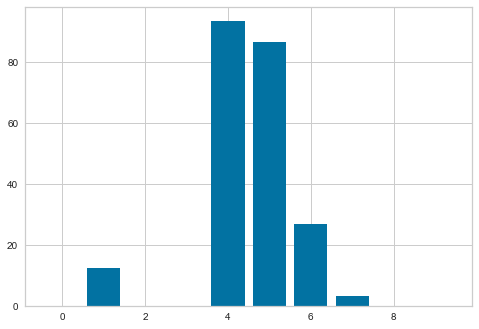

In [120]:
# linear regression feature importance
# define dataset
X, y = make_regression(n_samples=1000, n_features=10,
                       n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

The scores suggest that the model found the five important features and marked all other features with a zero coefficient, essentially removing them from the model. **This approach may also be used with Ridge, Lasso, and ElasticNet models from scikitlearn.**

<a id="log"></a>
<ins>Logistic Regression Feature Importance</ins>

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

Feature: 0, Score: 0.16320
Feature: 1, Score: -0.64301
Feature: 2, Score: 0.48497
Feature: 3, Score: -0.46190
Feature: 4, Score: 0.18432
Feature: 5, Score: -0.11978
Feature: 6, Score: -0.40602
Feature: 7, Score: 0.03772
Feature: 8, Score: -0.51785
Feature: 9, Score: 0.26540


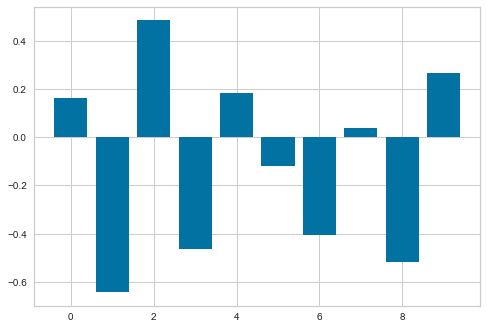

In [122]:
# logistic regression for feature importance

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5,
random_state=1)

# define the model
model = LogisticRegression()

# fit the model
model.fit(X, y)

# get importance
importance = model.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

This is a classification problem with classes 0 and 1. Notice that the coefficients are both positive and negative. 
- The positive scores indicate a feature that predicts class 1, whereas
- the negative scores indicate a feature that predicts class 0

No clear pattern of important and unimportant features can be identified from these results. Nevertheless, this technique may provide insight on a binary classification dataset.

<a id="dtree"></a>
<h5><ins>Decision Tree Feature Importance</ins></h5>

Decision tree algorithms like classification and regression trees (CART) offer importance scores based on the reduction in the criterion used to select split points, like Gini or entropy. This same approach can be used for ensembles of decision trees, such as the random forest and stochastic gradient boosting algorithms.

<a id="cart_reg"></a>
<ins>CART Regression Feature Importance</ins><br>
We can use the CART algorithm for feature importance implemented in scikit learn as the `DecisionTreeRegressor` and `DecisionTreeClassifier` classes. After being fit, the model provides a `feature_importances` property that can be accessed to retrieve the relative importance scores for each input feature.

In [123]:
# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor

Feature: 0, Score: 0.00240
Feature: 1, Score: 0.00451
Feature: 2, Score: 0.00243
Feature: 3, Score: 0.00188
Feature: 4, Score: 0.51648
Feature: 5, Score: 0.43874
Feature: 6, Score: 0.02665
Feature: 7, Score: 0.00329
Feature: 8, Score: 0.00246
Feature: 9, Score: 0.00117


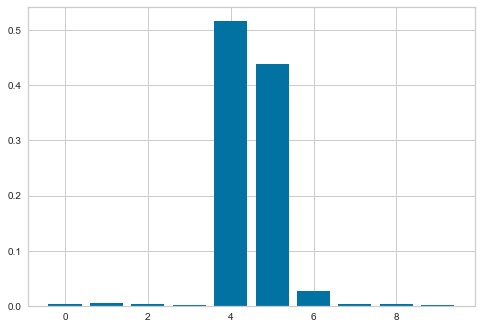

In [124]:
# define dataset
X, y = make_regression(n_samples=1000, n_features=10,
                       n_informative=5, random_state=1)

# define the model
model = DecisionTreeRegressor()

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

The results suggest perhaps three of the 10 features as being important to prediction.

<a id="cart_cla"></a>
<ins>CART Classification Feature Importance</ins><br>

In [125]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

Feature: 0, Score: 0.02158
Feature: 1, Score: 0.01713
Feature: 2, Score: 0.18378
Feature: 3, Score: 0.30166
Feature: 4, Score: 0.08124
Feature: 5, Score: 0.00285
Feature: 6, Score: 0.16194
Feature: 7, Score: 0.04520
Feature: 8, Score: 0.13412
Feature: 9, Score: 0.05052


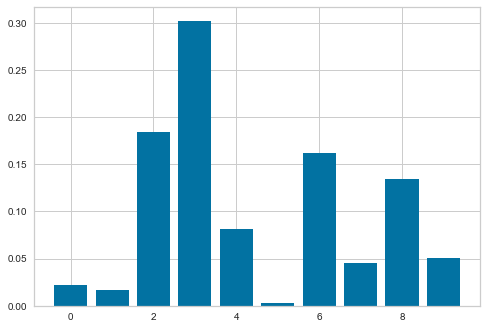

In [126]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5,
random_state=1)

# define the model
model = DecisionTreeClassifier()

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

The results suggest perhaps 4-5 of the 10 features as being important to prediction.

<a id="forest"></a>
<h5><ins>Random Forest Feature Importance</ins></h5>

We can use the Random Forest algorithm for feature importance implemented in scikit-learn as the `RandomForestRegressor` and `RandomForestClassifier` classes. After being fit, the model provides a `feature_importances` property that can be accessed to retrieve the relative importance scores for each input feature. This approach can also be used with the bagging and extra trees algorithms.

<a id="forest_reg"></a>
<ins>Random Forest Regression Feature Importance</ins><br>

In [127]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor

Feature: 0, Score: 0.00294
Feature: 1, Score: 0.00499
Feature: 2, Score: 0.00279
Feature: 3, Score: 0.00293
Feature: 4, Score: 0.52906
Feature: 5, Score: 0.42262
Feature: 6, Score: 0.02594
Feature: 7, Score: 0.00291
Feature: 8, Score: 0.00312
Feature: 9, Score: 0.00270


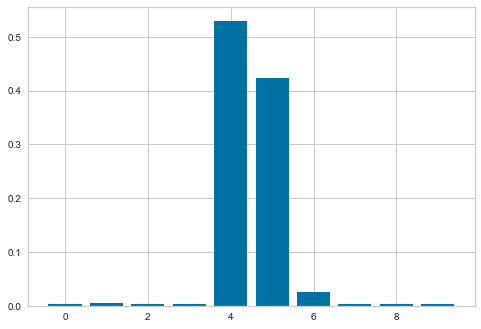

In [128]:
# define dataset
X, y = make_regression(n_samples=1000, n_features=10,
                       n_informative=5, random_state=1)

# define the model
model = RandomForestRegressor()

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

The results suggest perhaps two or three of the 10 features as being important to prediction.

<a id="forest_cla"></a>
<ins>Random Forest Classification Feature Importance</ins><br>

In [129]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

Feature: 0, Score: 0.06548
Feature: 1, Score: 0.11988
Feature: 2, Score: 0.16571
Feature: 3, Score: 0.18316
Feature: 4, Score: 0.07866
Feature: 5, Score: 0.11115
Feature: 6, Score: 0.09531
Feature: 7, Score: 0.05099
Feature: 8, Score: 0.08783
Feature: 9, Score: 0.04183


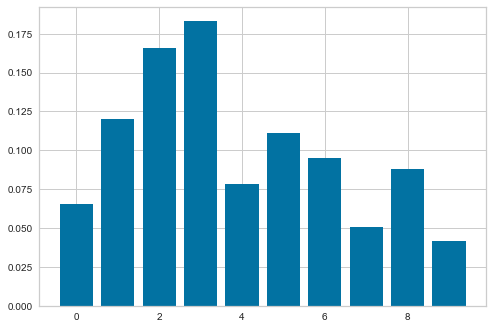

In [130]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, 
                           n_informative=5, n_redundant=5, random_state=1)

# define the model
model = RandomForestClassifier()

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

The results suggest perhaps two of the 10 features as being less important to prediction.

<a id="perm"></a>
<h5><ins>Permutation Feature Importance</ins></h5>

Permutation feature importance is a technique for calculating relative importance scores that is independent of the model used. First, a model is fit on the dataset, such as a model that does not support native feature importance scores. Then the model is used to make predictions on a dataset, although the values of a feature (column) in the dataset are scrambled. This is repeated for each feature in the dataset. Then this whole process is repeated 3, 5, 10 or more times. The result is a mean importance score for each input feature (and distribution of scores given the repeats).

This approach can be used for regression or classification and requires that a performance metric be chosen as the basis of the importance score, such as the mean squared error for regression and accuracy for classification. Permutation feature selection can be used via the `permutation_importance()` function that takes a fit model, a dataset (train or test dataset is fine), and a scoring function. Let’s take a look at this approach to feature selection with an algorithm that does not support feature selection natively, specifically k nearest neighbors.

<a id="perm_reg"></a>
<ins>Permutation Feature Importance for Regression</ins>

In [131]:
# permutation feature importance with knn for regression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

Feature: 0, Score: 192.89987
Feature: 1, Score: 359.17133
Feature: 2, Score: 113.37917
Feature: 3, Score: 41.17512
Feature: 4, Score: 9476.89123
Feature: 5, Score: 7625.49016
Feature: 6, Score: 917.27450
Feature: 7, Score: 131.44963
Feature: 8, Score: 130.21362
Feature: 9, Score: 87.38490


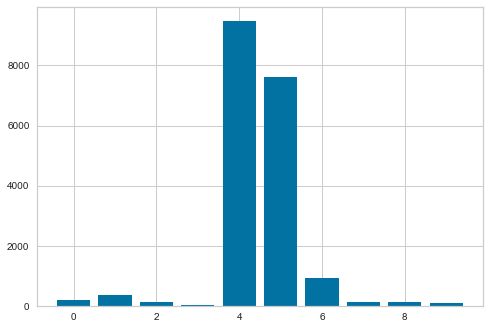

In [132]:
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

# define the model
model = KNeighborsRegressor()

# fit the model
model.fit(X, y)

# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')

# get importance
importance = results.importances_mean

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

The results suggest perhaps two or three of the 10 features as being important to prediction.

<a id="perm_cla"></a>
<ins>Permutation Feature Importance for Classification</ins>

In [133]:
# permutation feature importance with knn for regression
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

Feature: 0, Score: 0.04920
Feature: 1, Score: 0.06620
Feature: 2, Score: 0.04980
Feature: 3, Score: 0.08740
Feature: 4, Score: 0.05120
Feature: 5, Score: 0.05440
Feature: 6, Score: 0.07580
Feature: 7, Score: 0.06100
Feature: 8, Score: 0.05400
Feature: 9, Score: 0.03360


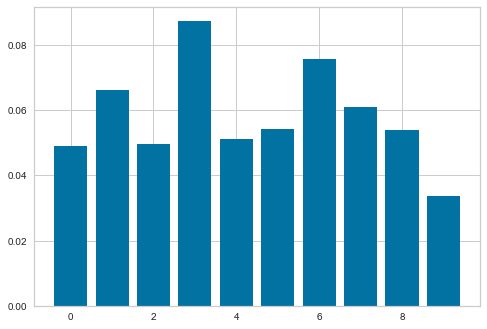

In [134]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, 
                           n_informative=5, n_redundant=5, random_state=1)
# define the model
model = KNeighborsClassifier()

# fit the model
model.fit(X, y)

# perform permutation importance
results = permutation_importance(model, X, y, scoring='accuracy')

# get importance
importance = results.importances_mean

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

The results suggest perhaps two or three of the 10 features as being important to prediction.

<a id="fsi"></a>
<h5><ins>Feature Selection with Importance</ins></h5>

Feature importance scores can be used to help interpret the data, but they can also be used directly to help rank and select features that are most useful to a predictive model.

In [135]:
# evaluation of a model using all features
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [136]:
# define the dataset
X, y = make_classification(n_samples=1000, n_features=10,
                           n_informative=5, n_redundant=5, random_state=1)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33,
                                                    random_state=1)

# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# evaluate the model
yhat = model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 84.55


In this case we can see that the model achieved the classification accuracy of about 84.55 percent using all features in the dataset.

Given that we created the dataset to have 5 informative features, we would expect better or the same results with half the number of input variables. We could use any of the feature importance scores previously mentioned, but in this case we will use the feature importance scores provided by random forest. We can use the `SelectFromModel` class to define both the model we wish to calculate importance scores, `RandomForestClassifier` in this case, and the number of features to select, 5 in this case.

In [137]:
from sklearn.feature_selection import SelectFromModel

In [138]:
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectFromModel(RandomForestClassifier(n_estimators=200),
                         max_features=5)

    # learn relationship from training data
    fs.fit(X_train, y_train)

    # transform train & test input data
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)

# evaluate the model
yhat = model.predict(X_test_fs)

# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 79.09


In this case, we can see that the model achieves the same performance on the dataset, although with half the number of input features. As expected, the feature importance scores calculated by random forest allowed us to accurately rank the input features and delete those that were not relevant to the target variable.

<a id="brick"></a>
<h5><ins>Feature Importance with `Yellowbrick`</ins></h5>

The feature engineering process involves selecting the minimum required features to produce a valid model because the more features a model contains, the more complex it is (and the more sparse the data), therefore the more sensitive the model is to errors due to variance. A common approach to eliminating features is to describe their relative importance to a model, then eliminate weak features or combinations of features and re-evalute to see if the model fairs better during cross-validation.

Many model forms describe the underlying impact of features relative to each other. In scikit-learn, Decision Tree models and ensembles of trees such as Random Forest, Gradient Boosting, and Ada Boost provide a `feature_importances_` attribute when fitted. The Yellowbrick FeatureImportances visualizer utilizes this attribute to rank and plot relative importances.

In [139]:
from yellowbrick.model_selection import FeatureImportances

In [140]:
X, y = make_classification(n_samples=1000, n_features=10,
                           n_informative=5, n_redundant=5, random_state=1)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33,
                                                    random_state=1)

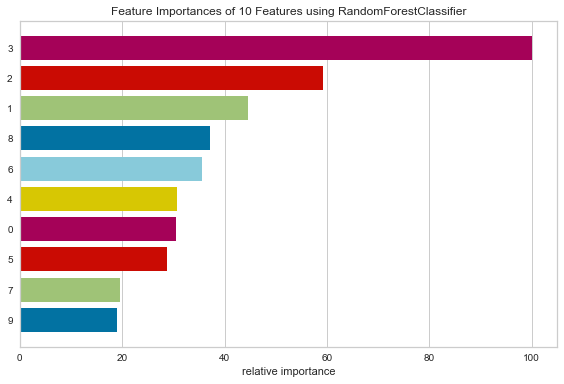

<AxesSubplot:title={'center':'Feature Importances of 10 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [141]:
model = RandomForestClassifier(n_estimators=10)
viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()

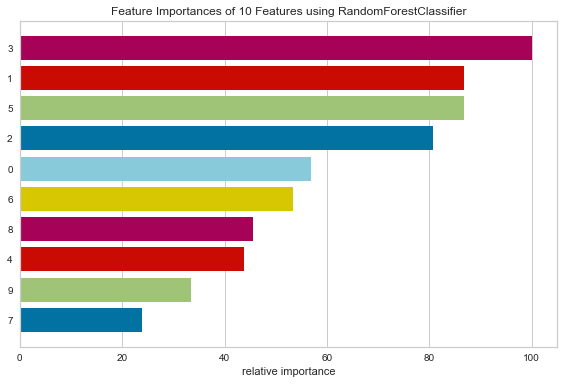

<AxesSubplot:title={'center':'Feature Importances of 10 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [142]:
model = RandomForestClassifier(n_estimators=10)
viz = FeatureImportances(model)
viz.fit(X_train, y_train)
viz.show()

The above figures show the features ranked according to the explained variance each feature contributes to the model. In this case the features are plotted against their relative importance, that is the percent importance of the most important feature. The visualizer also contains `features_` and `feature_importances_` attributes to get the ranked numeric values.

For models that do not support a `feature_importances_` attribute, the FeatureImportances visualizer will also draw a bar plot for the `coef_` attribute that many linear models provide.

When using a model with a `coef_` attribute, it is better to set `relative=False` to draw the true magnitude of the coefficient (which may be negative).

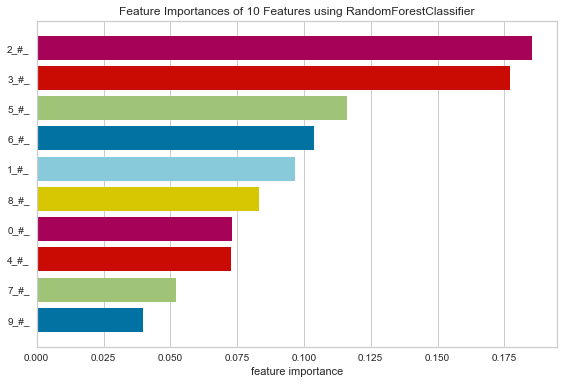

<AxesSubplot:title={'center':'Feature Importances of 10 Features using RandomForestClassifier'}, xlabel='feature importance'>

In [143]:
model = RandomForestClassifier(n_estimators=10)

labels = list(map(lambda s: str(s)+'_#_', range(10)))
viz = FeatureImportances(model,labels=labels, relative=False)
viz.fit(X_train, y_train)
viz.show()

<ins>Stacked Feature Importances</ins>

Some estimators return a multi-dimensonal array for either `feature_importances_` or `coef_` attributes. For example the LogisticRegression classifier returns a `coef_` array in the shape of (n_classes, n_features) in the multiclass case. These coefficients map the importance of the feature to the prediction of the probability of a specific class. Although the interpretation of multi-dimensional feature importances depends on the specific estimator and model family, the data is treated the same in the FeatureImportances visualizer – namely the importances are averaged.

Taking the mean of the importances may be undesirable for several reasons. For example, a feature may be more informative for some classes than others. Multi-output estimators also do not benefit from having averages taken across what are essentially multiple internal models. In this case, use the `stack=True` parameter to draw a stacked bar chart of importances as follows:

In [144]:
from sklearn.datasets import load_iris

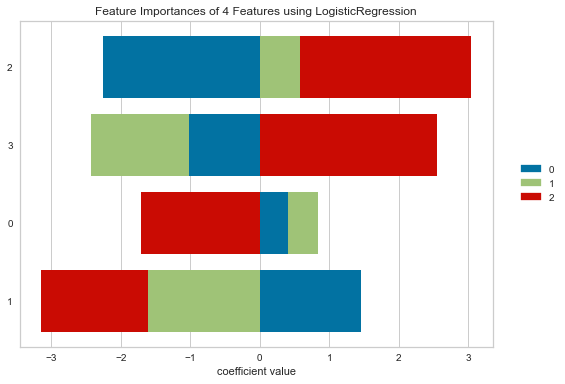

<AxesSubplot:title={'center':'Feature Importances of 4 Features using LogisticRegression'}, xlabel='coefficient value'>

In [145]:
data = load_iris()
X, y = data.data, data.target

model = LogisticRegression(multi_class="auto", solver="liblinear")
viz = FeatureImportances(model, stack=True, relative=False)
viz.fit(X, y)
viz.show()

<ins>Top and Bottom Feature Importances</ins>

It may be more illuminating to the feature engineering process to identify the most or least informative features. To view only the N most informative features, specify the `topn` argument to the visualizer. Similar to slicing a ranked list by their importance, if `topn` is a postive integer, then the most highly ranked features are used. If `topn` is a negative integer, then the lowest ranked features are displayed instead.

In [146]:
from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso

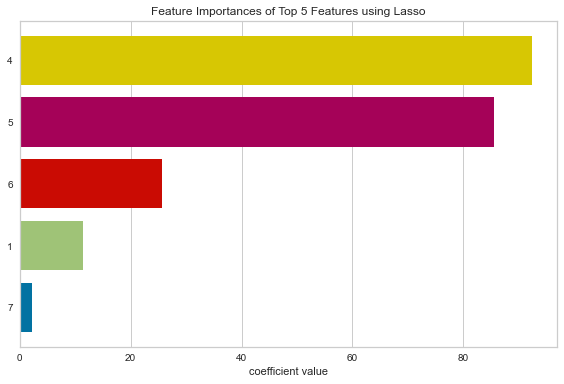

<AxesSubplot:title={'center':'Feature Importances of Top 5 Features using Lasso'}, xlabel='coefficient value'>

In [147]:
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5,
                       random_state=1)

viz = FeatureImportances(Lasso(), relative=False, topn=5)

viz.fit(X, y)
viz.show()

<a id='references'></a>
### REFERENCES

<ins>BOOKS</ins>
- [Data Preparation for Machine Learning by Jason Brownlee](https://machinelearningmastery.com/data-preparation-for-machine-learning/)

<ins>ARTICLES / WEBSITES</ins>
- [Towards Data Science - Intro to Feature Selection Methods for Data Science](https://towardsdatascience.com/intro-to-feature-selection-methods-for-data-science-4cae2178a00a)
- [Towards Data Science - Feature Selection Techniques in Machine Learning with Python](https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e)
- [Towards Data Science - Powerful Feature Selection with Recursive Feature Elimination (RFE) of Sklearn](https://towardsdatascience.com/powerful-feature-selection-with-recursive-feature-elimination-rfe-of-sklearn-23efb2cdb54e)
- [DataSklr](https://www.datasklr.com/ols-least-squares-regression/variable-selection)
- [Step Forward Feature Selection: A Practical Example in Python](https://www.kdnuggets.com/2018/06/step-forward-feature-selection-python.html)
- [A comprehensive guide to Feature Selection using Wrapper methods in Python](https://www.analyticsvidhya.com/blog/2020/10/a-comprehensive-guide-to-feature-selection-using-wrapper-methods-in-python/)

<ins>PYTHON PACKAGES</ins>
- [Scikit Learn Documentation](https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection)
- [mlxtend - python module](http://rasbt.github.io/mlxtend/)
- [Yellowbrick - Machine Learning Visualization module](https://www.scikit-yb.org/en/latest/index.html)